In [187]:
library(ggplot2)
library(dplyr)
library(tidyverse)

In [188]:
# ggplot theme #
my_theme0 <- theme(panel.background = element_rect(fill = "transparent", 
                                                colour = NA), plot.background = element_rect(colour = 'NA', 
                                                                                             fill = 'transparent'),panel.grid.major=element_line(color=NA),
                axis.line=element_line(size=1.2,color="black"),
                axis.ticks=element_line(color="black"),
                axis.text=element_text(color="black",size=26),
                axis.title=element_text(color="black",size=30),
                panel.grid.minor = element_line(colour = NA),
                legend.text=element_text(size=17),legend.key=element_rect(fill="white"),
                legend.title=element_text(size=18,face="bold"),
                axis.text.x=element_text(angle=60,size=26,vjust=0.5),
                panel.border = element_rect(colour = "black", fill=NA, size=1),
                legend.position = "none")

my_theme1 <- theme_bw() + 
  theme(panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        text = element_text(size = 16),
        axis.title.x = element_text(size=18, color="black"), 
        axis.title.y = element_text(size=18, color="black"), 
        axis.text.x = element_text(angle = 0, hjust = 1, color="black"), 
        panel.grid.minor.x = element_line(colour = "grey", size=0.2, linetype = 'dashed'), 
        panel.grid.major.x = element_line(colour = "grey", size=0.2),
        panel.grid.minor.y = element_line(colour = "grey", size = 0.2, linetype = 'dashed'),
        panel.grid.major.y = element_line(colour = "grey", size=0.2),
        legend.position = "bottom", 
        legend.text=element_text(size=10), 
        legend.key.size = unit(1,"line"), 
        plot.margin=unit(c(1,1,1,1),"cm")
       ) 

* get percentages of HOT and BATS

In [218]:
pct_meta_file <- "/home/shengwei/GitHub/projects/bioGEOTRACES/05_MERGED_DEF_Counts_bamcov/DEF_MERGED_min_2000_pct_meta.tsv"
pct_meta_df <- read.table(pct_meta_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
colnames(pct_meta_df)
GP13_pct_meta_df <- pct_meta_df %>%
  filter(GEOTRACES_Section == "GP13", TotalCnt >= 500) %>% 
  select(NCBI_SRA_Acc, Collection_Year, Collection_Month, Collection_Date, Cruise_Station, Latitude, Longitude, Depth, Total_Read_Pairs, Eukaryote:TotalCnt)
head(GP13_pct_meta_df)

[1] "Sample_Name"                "Sample_ID"                 
 [3] "Cruise_Series"              "GEOTRACES_Section"         
 [5] "Cruise_ID"                  "Cruise_Station"            
 [7] "Collection_Date"            "Collection_Year"           
 [9] "Collection_Month"           "Collection_Time"           
[11] "Depth"                      "Env_Biome"                 
[13] "Env_Feature"                "Env_Material"              
[15] "Geo_Loc_Name"               "Latitude_Longitude"        
[17] "Latitude"                   "Longitude"                 
[19] "Bottle_ID"                  "NCBI_BioPrj"               
[21] "NCBI_SRA_Study"             "NCBI_BioSample"            
[23] "NCBI_SRA_Acc"               "Total_Read_Pairs"          
[25] "Total_Bases"                "NCBI_SRA_Accession_Contigs"
[27] "Assembly_Method"            "Eukaryote"                 
[29] "EukaryoteVirus"             "Plasmid"                   
[31] "Prokaryote"                 "ProkaryoteVirus"           
[33] "TotalCnt"

NCBI_SRA_Acc Collection_Year Collection_Month Collection_Date Cruise_Station
1 SRR5788170   2011            6                6/17/2011       GT14          
2 SRR5788171   2011            6                6/17/2011       GT15          
3 SRR5788176   2011            6                6/17/2011       GT15          
4 SRR5788177   2011            6                6/17/2011       GT15          
5 SRR5788149   2011            6                6/17/2011       GT15          
6 SRR5788148   2011            6                6/17/2011       GT15          
  Latitude  Longitude Depth Total_Read_Pairs Eukaryote EukaryoteVirus Plasmid 
1 -32.46367 -159.0193 101   20106418          9.355886 3.925555       19.04403
2 -32.49500 -157.9945  14   29691794         15.402164 4.571207       23.79377
3 -32.49500 -157.9945  31   25747894         16.737873 4.181320       24.61243
4 -32.49500 -157.9945  51   19301361         14.169900 3.477973       28.71036
5 -32.49500 -157.9945  76   24209271         16.191409 3.564140       26.91108
6 -32.49500 -157.9945 100   27031399         13.686584 4.394102       26.70880
  Prokaryote ProkaryoteVirus TotalCnt
1 18.07829   49.59624        4940804 
2 32.75140   23.48146        8312793 
3 33.44944   21.01894        6725054 
4 34.97246   18.66931        5643632 
5 34.39897   18.93440        6270208 
6 34.47040   20.74012        8035475

* Calculate overall percentages among all clean reads

In [260]:
GP13_pct_meta_df2 <- GP13_pct_meta_df %>% 
  mutate(Eukaryote = Eukaryote * TotalCnt / Total_Read_Pairs) %>% 
  mutate(EukaryoteVirus = EukaryoteVirus * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Plasmid = Plasmid * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Prokaryote = Prokaryote * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Prok_n_Plas = Prokaryote + Plasmid) %>% 
  mutate(ProkaryoteVirus = ProkaryoteVirus * TotalCnt / Total_Read_Pairs) 
head(GP13_pct_meta_df2, 2)

NCBI_SRA_Acc Collection_Year Collection_Month Collection_Date Cruise_Station
1 SRR5788170   2011            6                6/17/2011       GT14          
2 SRR5788171   2011            6                6/17/2011       GT15          
  Latitude  Longitude Depth Total_Read_Pairs Eukaryote EukaryoteVirus Plasmid 
1 -32.46367 -159.0193 101   20106418         2.299047  0.9646373      4.679740
2 -32.49500 -157.9945  14   29691794         4.312134  1.2797980      6.661527
  Prokaryote ProkaryoteVirus TotalCnt Prok_n_Plas
1 4.442427   12.187417       4940804   9.122167  
2 9.169389    6.574089       8312793  15.830916

In [261]:
table(GP13_pct_meta_df2$Longitude)
table(GP13_pct_meta_df2$Depth)


  -179.125    -176.03 -171.99899 -170.99533       -170 -169.99517   -169.991 
         6          6          5          5          6          6          2 
-169.00233   -168.002 -167.00217 -165.99883 -164.99233 -164.98117 -163.98967 
         5          5          5          5          6          2          5 
 -162.9935   -162.009 -160.99283 -160.00783 -159.01933   -158.028  -157.9945 
         5          5          5          5          5          2          6 
-157.00883 -156.01067 -154.99933 -154.00417 -153.99817 -153.00567  -151.9995 
         5          5          5          2          6          4          5 
-151.00067  153.50101    154.004  155.98599        159    162.998    166.987 
         4          2          5          5          5          5          5 
       171  174.00101     175.98        178 
         5          5          5          5 


  13.8     14   14.9     15   15.1   15.2   15.4   15.5   15.6     16   16.1 
     1      3      2     13      2      1      1      3      2      4      1 
    17     28   28.4   29.3   29.5   29.9     30   30.1   30.6   30.7   30.8 
     2      1      1      1      1      1     10      1      1      1      2 
  30.9     31     32     33     48   48.6   48.9     49   49.8     50   50.3 
     2      4      6      1      1      1      1      3      2      5      1 
  50.4   50.6     51   51.1   51.2   51.3   51.7     52     72     73     74 
     2      2      5      2      1      1      1      7      1      1      2 
  74.1   74.5   74.7   74.8     75   75.1   75.2   75.4     76   76.8     77 
     1      2      1      1      6      2      1      1      9      1      3 
    78     99   99.7   99.8   99.9    100  100.3  100.4  100.5  100.8  100.9 
     2      1      1      1      1      4      3      1      1      1      1 
   101  101.7    102    103    201    202    203    204  999.9 

In [262]:
LongitudeRange_order <- c("E153-E156", "E159-E163", "E166-E172", "E174-176", "E178-W178", "W177-W172", "W172-W170", "W170-W169",
                           "W169-W166", "W166-W164", "W164-W161", "W161-W160", "W160-W158", "W158-W155", "W155-W153", "W153-W152", "W152-W150")
DepthRange_order <- c("D13-D17", "D28-D33", "D48-D52", "D72-D78", "D99-D103", "D201-D204", "D999-D5601")

GP13_pct_meta_df2 <- GP13_pct_meta_df2 %>% 
  mutate(Depth = as.numeric(Depth)) %>% 
  filter(Depth<999) %>%
  mutate(Longitude = as.integer(Longitude)) %>% 
  mutate(LongitudeRange = case_when(Longitude >= 153 & Longitude < 156 ~ "E153-E156", 
                                   Longitude >= 159 & Longitude < 163 ~ "E159-E163", 
                                   Longitude >= 166 & Longitude < 172 ~ "E166-E172",
                                   Longitude >= 174 & Longitude < 176 ~ "E174-176",
                                   Longitude >= 178 | Longitude < -178 ~ "E178-W178",
                                   Longitude >= -177 & Longitude < -172 ~ "W177-W172",
                                   Longitude >= -172 & Longitude < -170 ~ "W172-W170",
                                   Longitude >= -170 & Longitude < -169 ~ "W170-W169",
                                   Longitude >= -169 & Longitude < -166 ~ "W169-W166",
                                   Longitude >= -166 & Longitude < -164 ~ "W166-W164",
                                   Longitude >= -164 & Longitude < -161 ~ "W164-W161",
                                   Longitude >= -161 & Longitude < -160 ~ "W161-W160",
                                   Longitude >= -160 & Longitude < -158 ~ "W160-W158",
                                   Longitude >= -158 & Longitude < -155 ~ "W158-W155",
                                   Longitude >= -155 & Longitude < -153 ~ "W155-W153",
                                   Longitude >= -153 & Longitude < -152 ~ "W153-W152",
                                   Longitude >= -152 & Longitude < -150 ~ "W152-W150")) %>%
  mutate(LongitudeRange = factor(LongitudeRange, levels = LongitudeRange_order)) %>%
  mutate(DepthRange = case_when(Depth>=13 & Depth<= 17 ~ "D13-D17",
                                Depth>=28 & Depth<= 33 ~ "D28-D33",
                                Depth>=48 & Depth<= 52 ~ "D48-D52",
                                Depth>=72 & Depth<= 78 ~ "D72-D78",
                                Depth>=99 & Depth<= 103 ~ "D99-D103",
                                Depth>=201 & Depth<= 204 ~ "D201-D204",
                                Depth>=999 & Depth<= 5601 ~ "D999-D5601")) %>%
  mutate(DepthRange = factor(DepthRange, levels = DepthRange_order))
head(GP13_pct_meta_df2, 2)

NCBI_SRA_Acc Collection_Year Collection_Month Collection_Date Cruise_Station
1 SRR5788170   2011            6                6/17/2011       GT14          
2 SRR5788171   2011            6                6/17/2011       GT15          
  Latitude  Longitude Depth Total_Read_Pairs Eukaryote EukaryoteVirus Plasmid 
1 -32.46367 -159      101   20106418         2.299047  0.9646373      4.679740
2 -32.49500 -157       14   29691794         4.312134  1.2797980      6.661527
  Prokaryote ProkaryoteVirus TotalCnt Prok_n_Plas LongitudeRange DepthRange
1 4.442427   12.187417       4940804   9.122167   W160-W158      D99-D103  
2 9.169389    6.574089       8312793  15.830916   W158-W155      D13-D17

In [263]:
GP13_pct_meta_df2.long <- GP13_pct_meta_df2 %>% 
  select(LongitudeRange, DepthRange, Eukaryote, EukaryoteVirus, Prok_n_Plas, ProkaryoteVirus) %>% 
  gather(Eukaryote:ProkaryoteVirus, key="Seq_Class", value="Percentage") %>% 
  mutate(Seq_Class = factor(Seq_Class, levels=c("Prok_n_Plas", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus"))) 

head(GP13_pct_meta_df2.long, 2)
#GP13_pct_meta_df2.long[is.na(GP13_pct_meta_df2.long$LongitudeRange), ]

LongitudeRange DepthRange Seq_Class Percentage
1 W160-W158      D99-D103   Eukaryote 2.299047  
2 W158-W155      D13-D17    Eukaryote 4.312134

In [264]:
rects_8 <- data.frame(xmin = seq(1.5, 15.5, 2), 
                    xmax = seq(2.5, 16.5, 2))
rects_7 <- head(rects_8, 7)
rects_3 <- head(rects_8, 3)
rects_1 <- head(rects_8, 1)
head(rects_8, 2)
nrow(rects_8)

xmin xmax
1 1.5  2.5 
2 3.5  4.5

[1] 8

In [316]:
col_4 <- brewer.pal(name="Paired", n=4)
#col_4 <- c("#daa520", "#0a75ad", "#8a2be2", "#047806")
col_4

[1] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C"

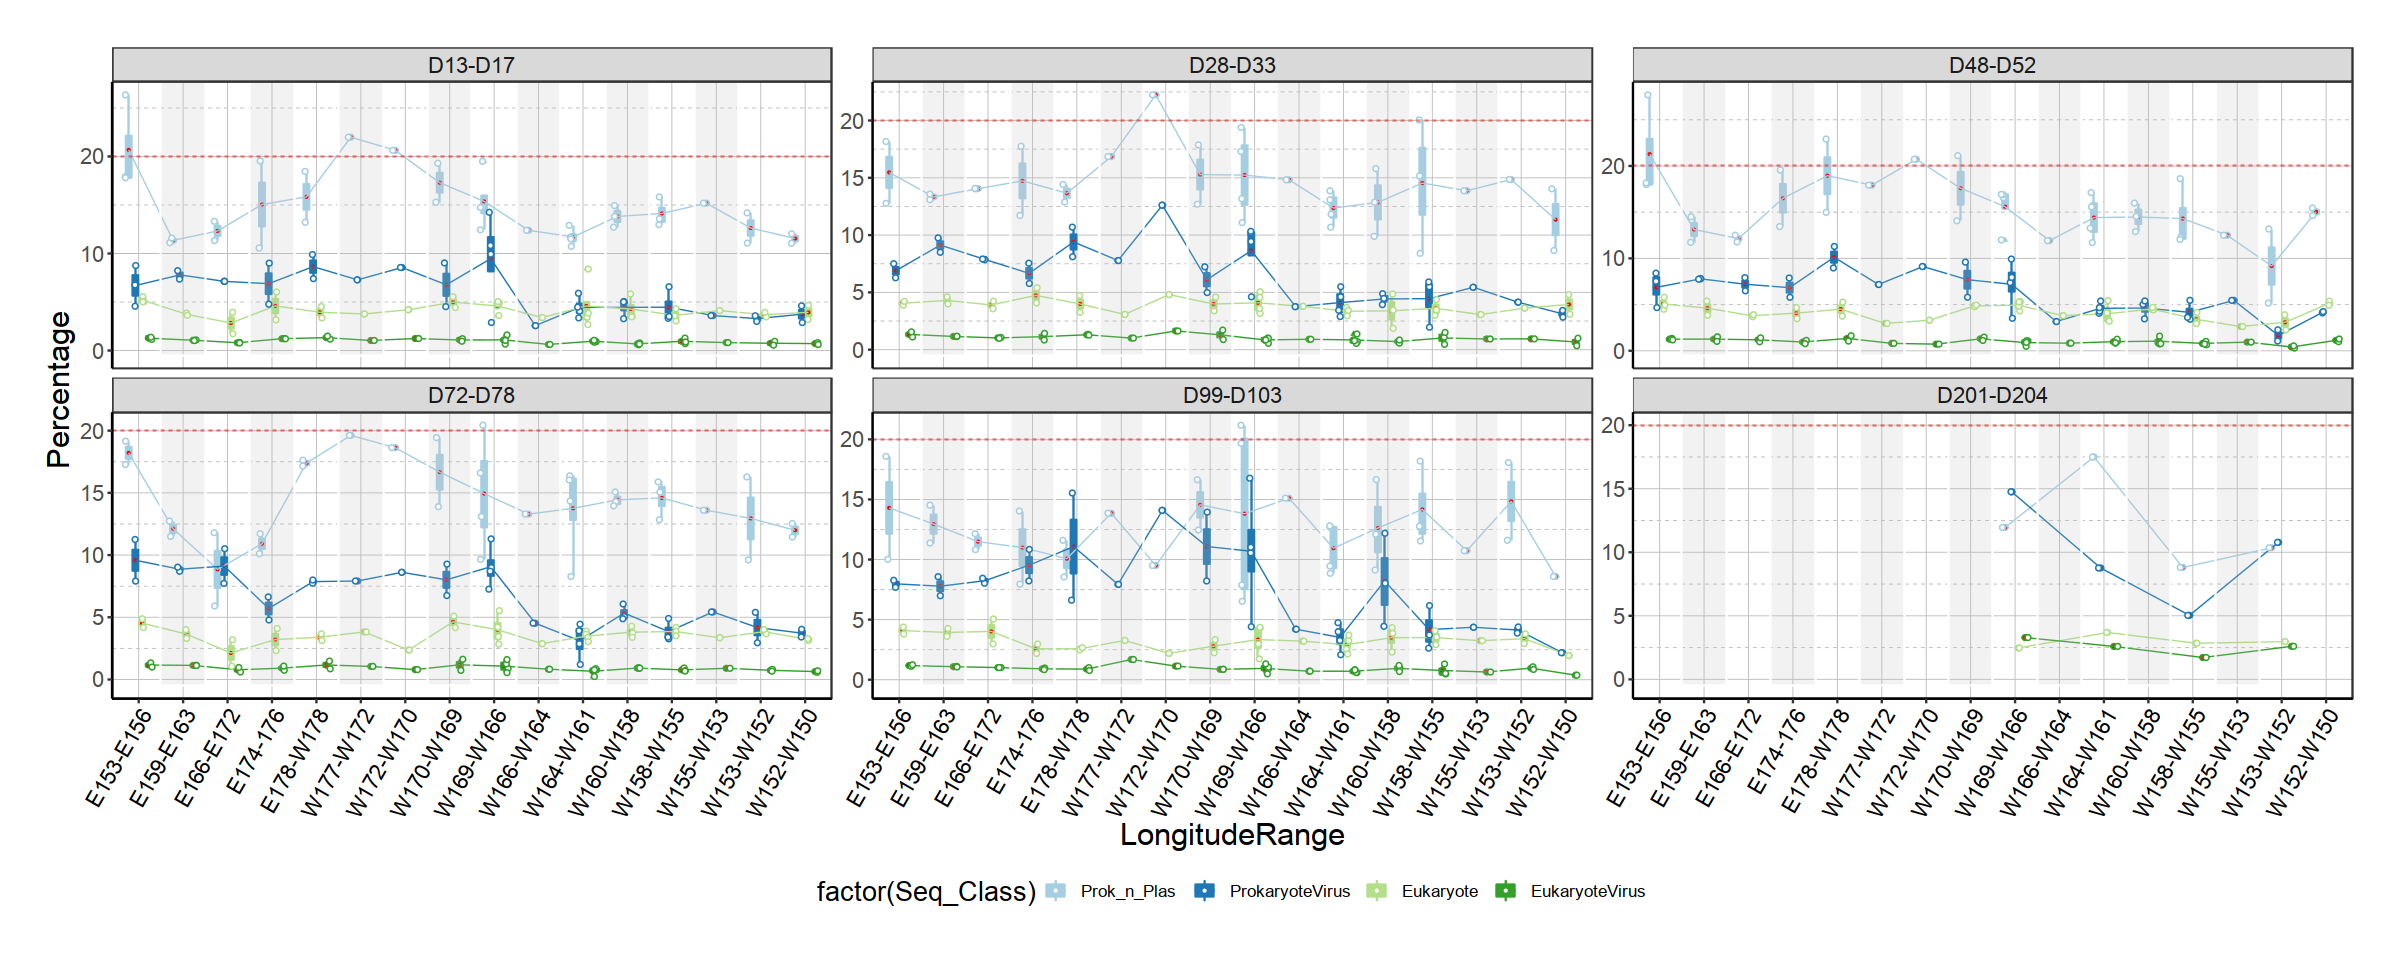

In [317]:
options(repr.plot.width=20, repr.plot.height=8)

p <- ggplot(data=GP13_pct_meta_df2.long, mapping=aes(x=LongitudeRange, y=Percentage, fill=factor(Seq_Class), color=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  facet_wrap(~DepthRange, nrow = 2, scales = "free_y") + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) 

p

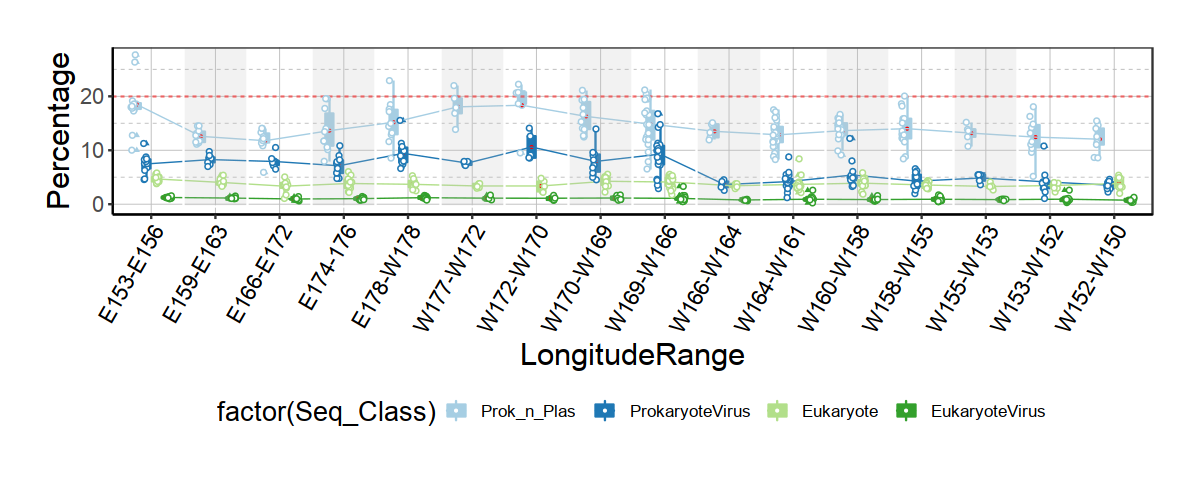

In [356]:
options(repr.plot.width=10, repr.plot.height=4)

p_2 <- ggplot(data=GP13_pct_meta_df2.long, mapping=aes(x=LongitudeRange, y=Percentage, fill=factor(Seq_Class),colour=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
p_2

ggsave(filename="bioGEOTRACES_DEF_Class_Percentages_GP13_boxplot_v1.pdf", 
       plot = last_plot(), path="./", useDingbats=FALSE,
       scale = 1, width = 300, height = 100, units = "mm",
       dpi = 300, limitsize = FALSE)

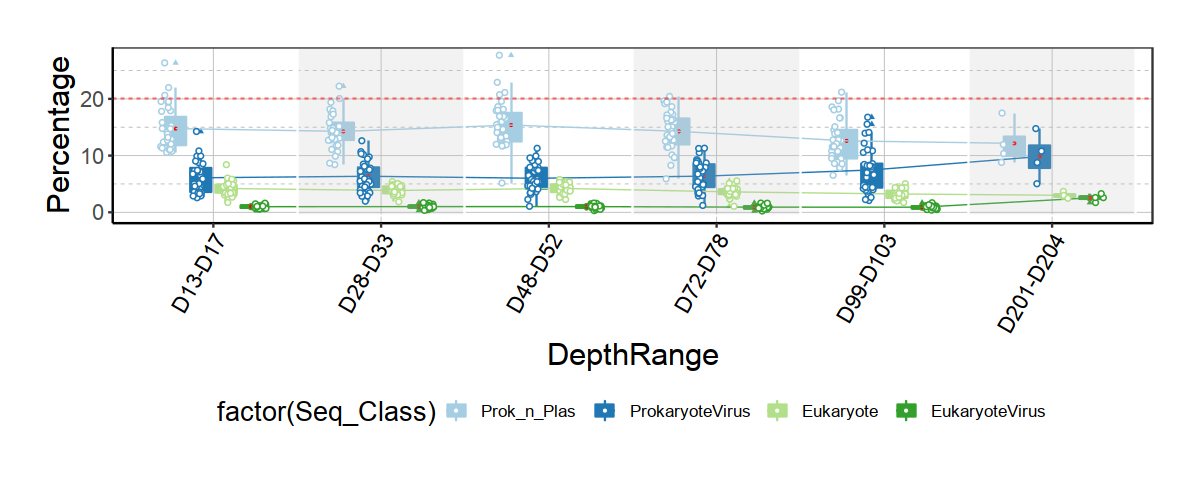

In [319]:
options(repr.plot.width=10, repr.plot.height=4)

p_3 <- ggplot(data=GP13_pct_meta_df2.long, mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class),colour=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
p_3

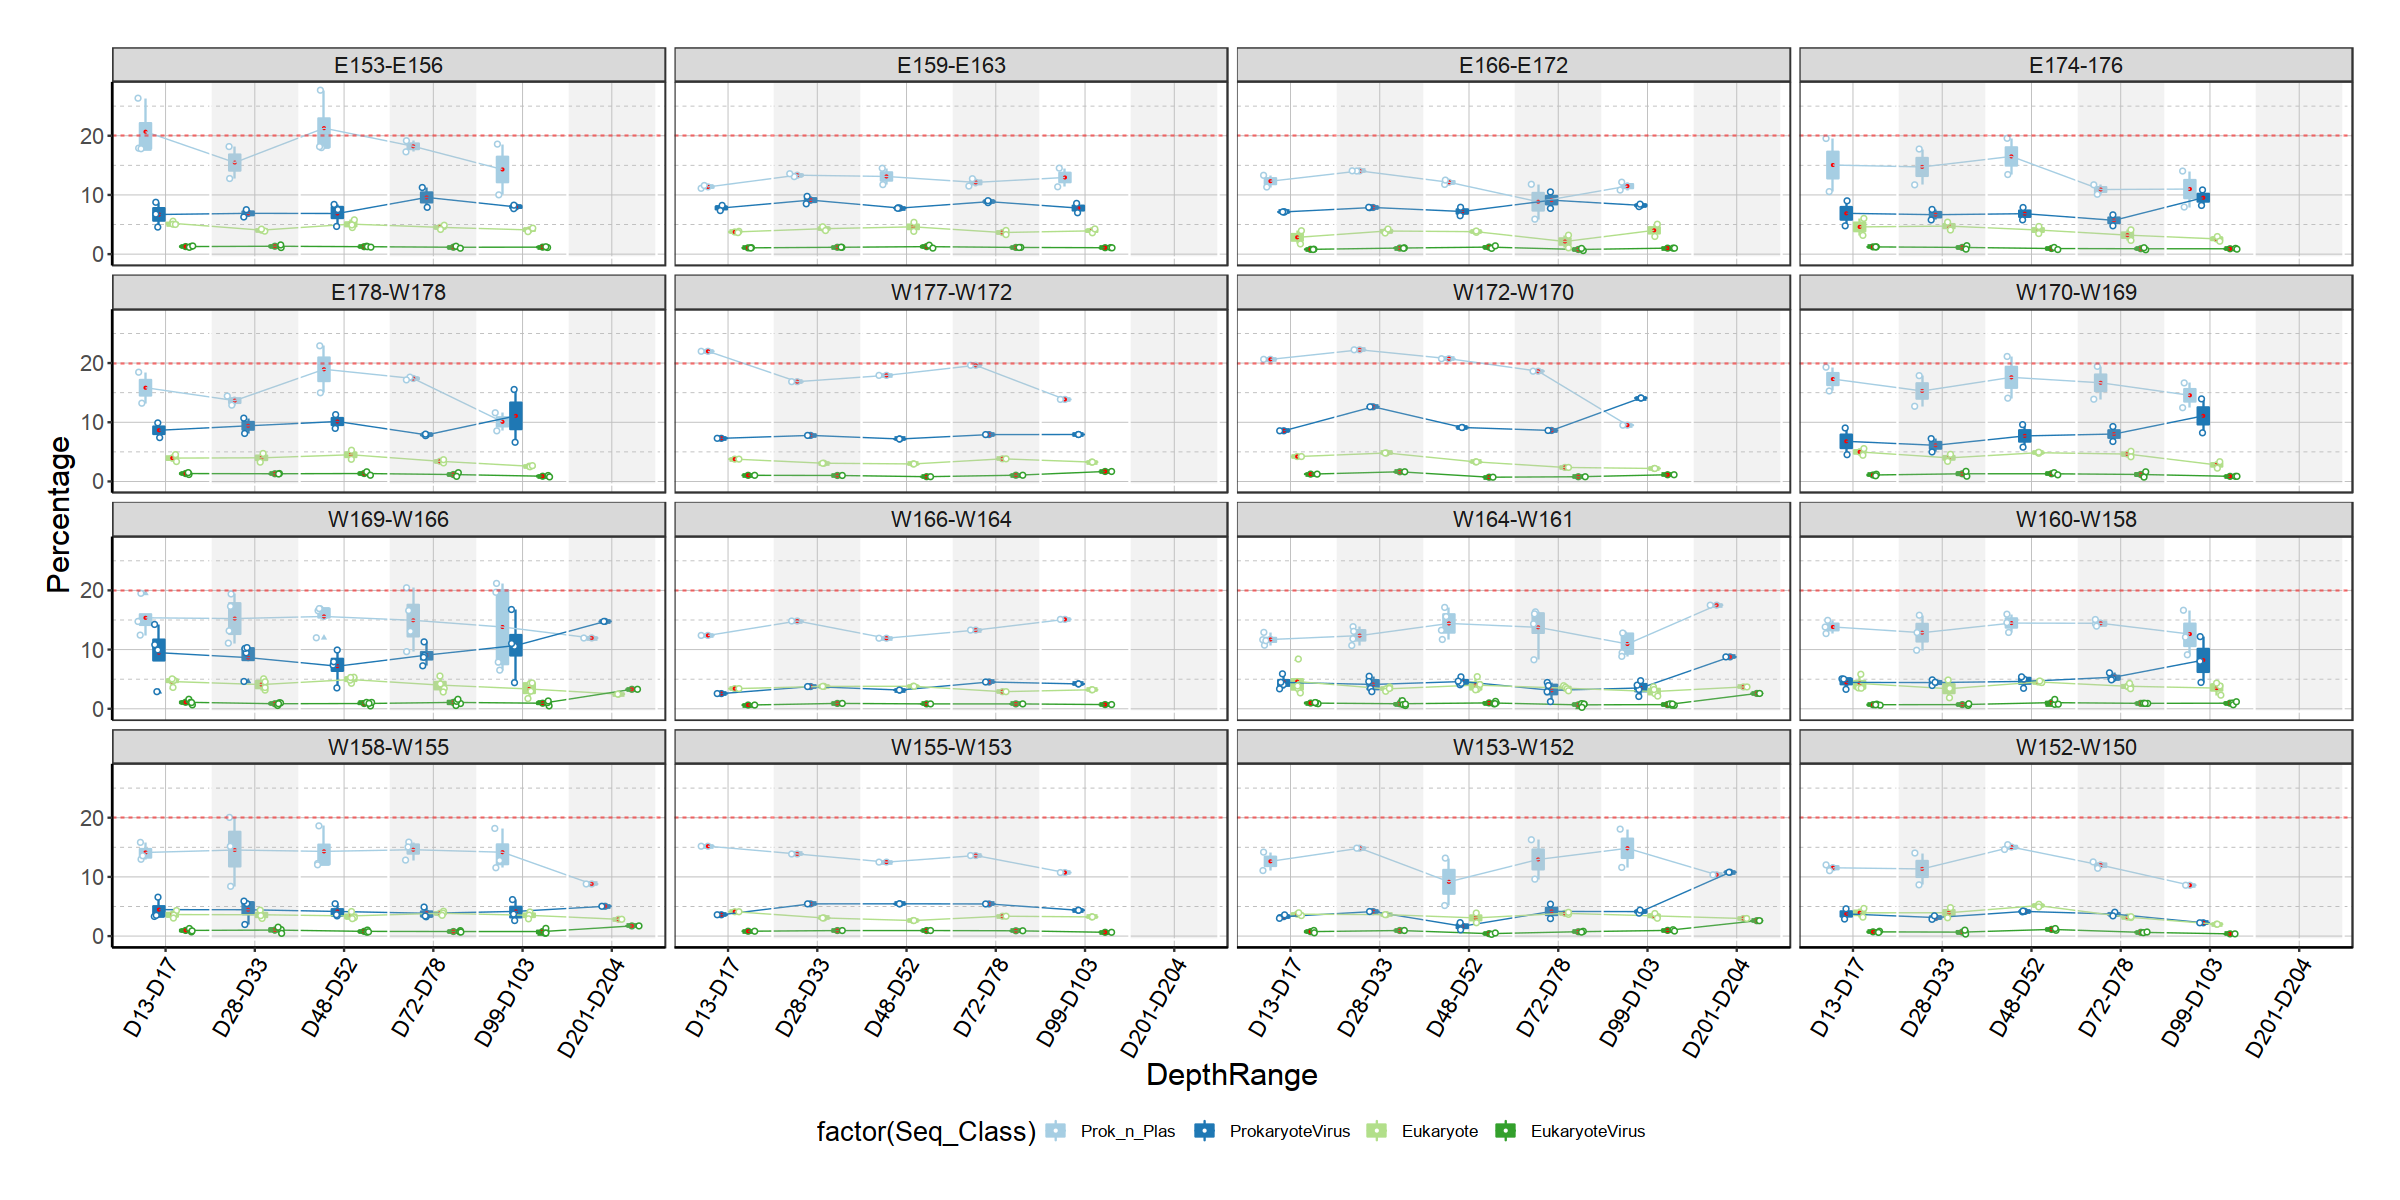

In [320]:
options(repr.plot.width=20, repr.plot.height=10)

p_4 <- ggplot(data=GP13_pct_meta_df2.long, mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class), colour=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + 
  facet_wrap(~LongitudeRange, nrow = 4)
p_4


In [228]:
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
    library(plyr)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # This does the summary. For each group's data frame, return a vector with
    # N, mean, and sd
    datac <- ddply(data, groupvars, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = length2(xx[[col]], na.rm=na.rm),
          mean = mean   (xx[[col]], na.rm=na.rm),
          sd   = sd     (xx[[col]], na.rm=na.rm)
        )
      },
      measurevar
    )

    # Rename the "mean" column    
    datac <- rename(datac, c("mean" = measurevar))

    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean

    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult

    return(datac)
}

In [229]:
GP13_pct_meta_df2.long.se <- summarySE(GP13_pct_meta_df2.long, measurevar="Percentage", groupvars=c("DepthRange","LongitudeRange", "Seq_Class"))
head(GP13_pct_meta_df2.long.se)

Warning message in qt(conf.interval/2 + 0.5, datac$N - 1):
“NaNs produced”


DepthRange LongitudeRange Seq_Class       N Percentage sd        se        
1 D13-D17    E153-E156      Prok_n_Plas     3 20.682066  4.9044732 2.83159893
2 D13-D17    E153-E156      ProkaryoteVirus 3  6.695829  2.0963549 1.21033109
3 D13-D17    E153-E156      Eukaryote       3  5.208104  0.3001799 0.17330895
4 D13-D17    E153-E156      EukaryoteVirus  3  1.275667  0.1149855 0.06638688
5 D13-D17    E159-E163      Prok_n_Plas     2 11.355150  0.3366481 0.23804617
6 D13-D17    E159-E163      ProkaryoteVirus 2  7.793002  0.6207838 0.43896041
  ci        
1 12.1833869
2  5.2076344
3  0.7456882
4  0.2856397
5  3.0246634
6  5.5775208

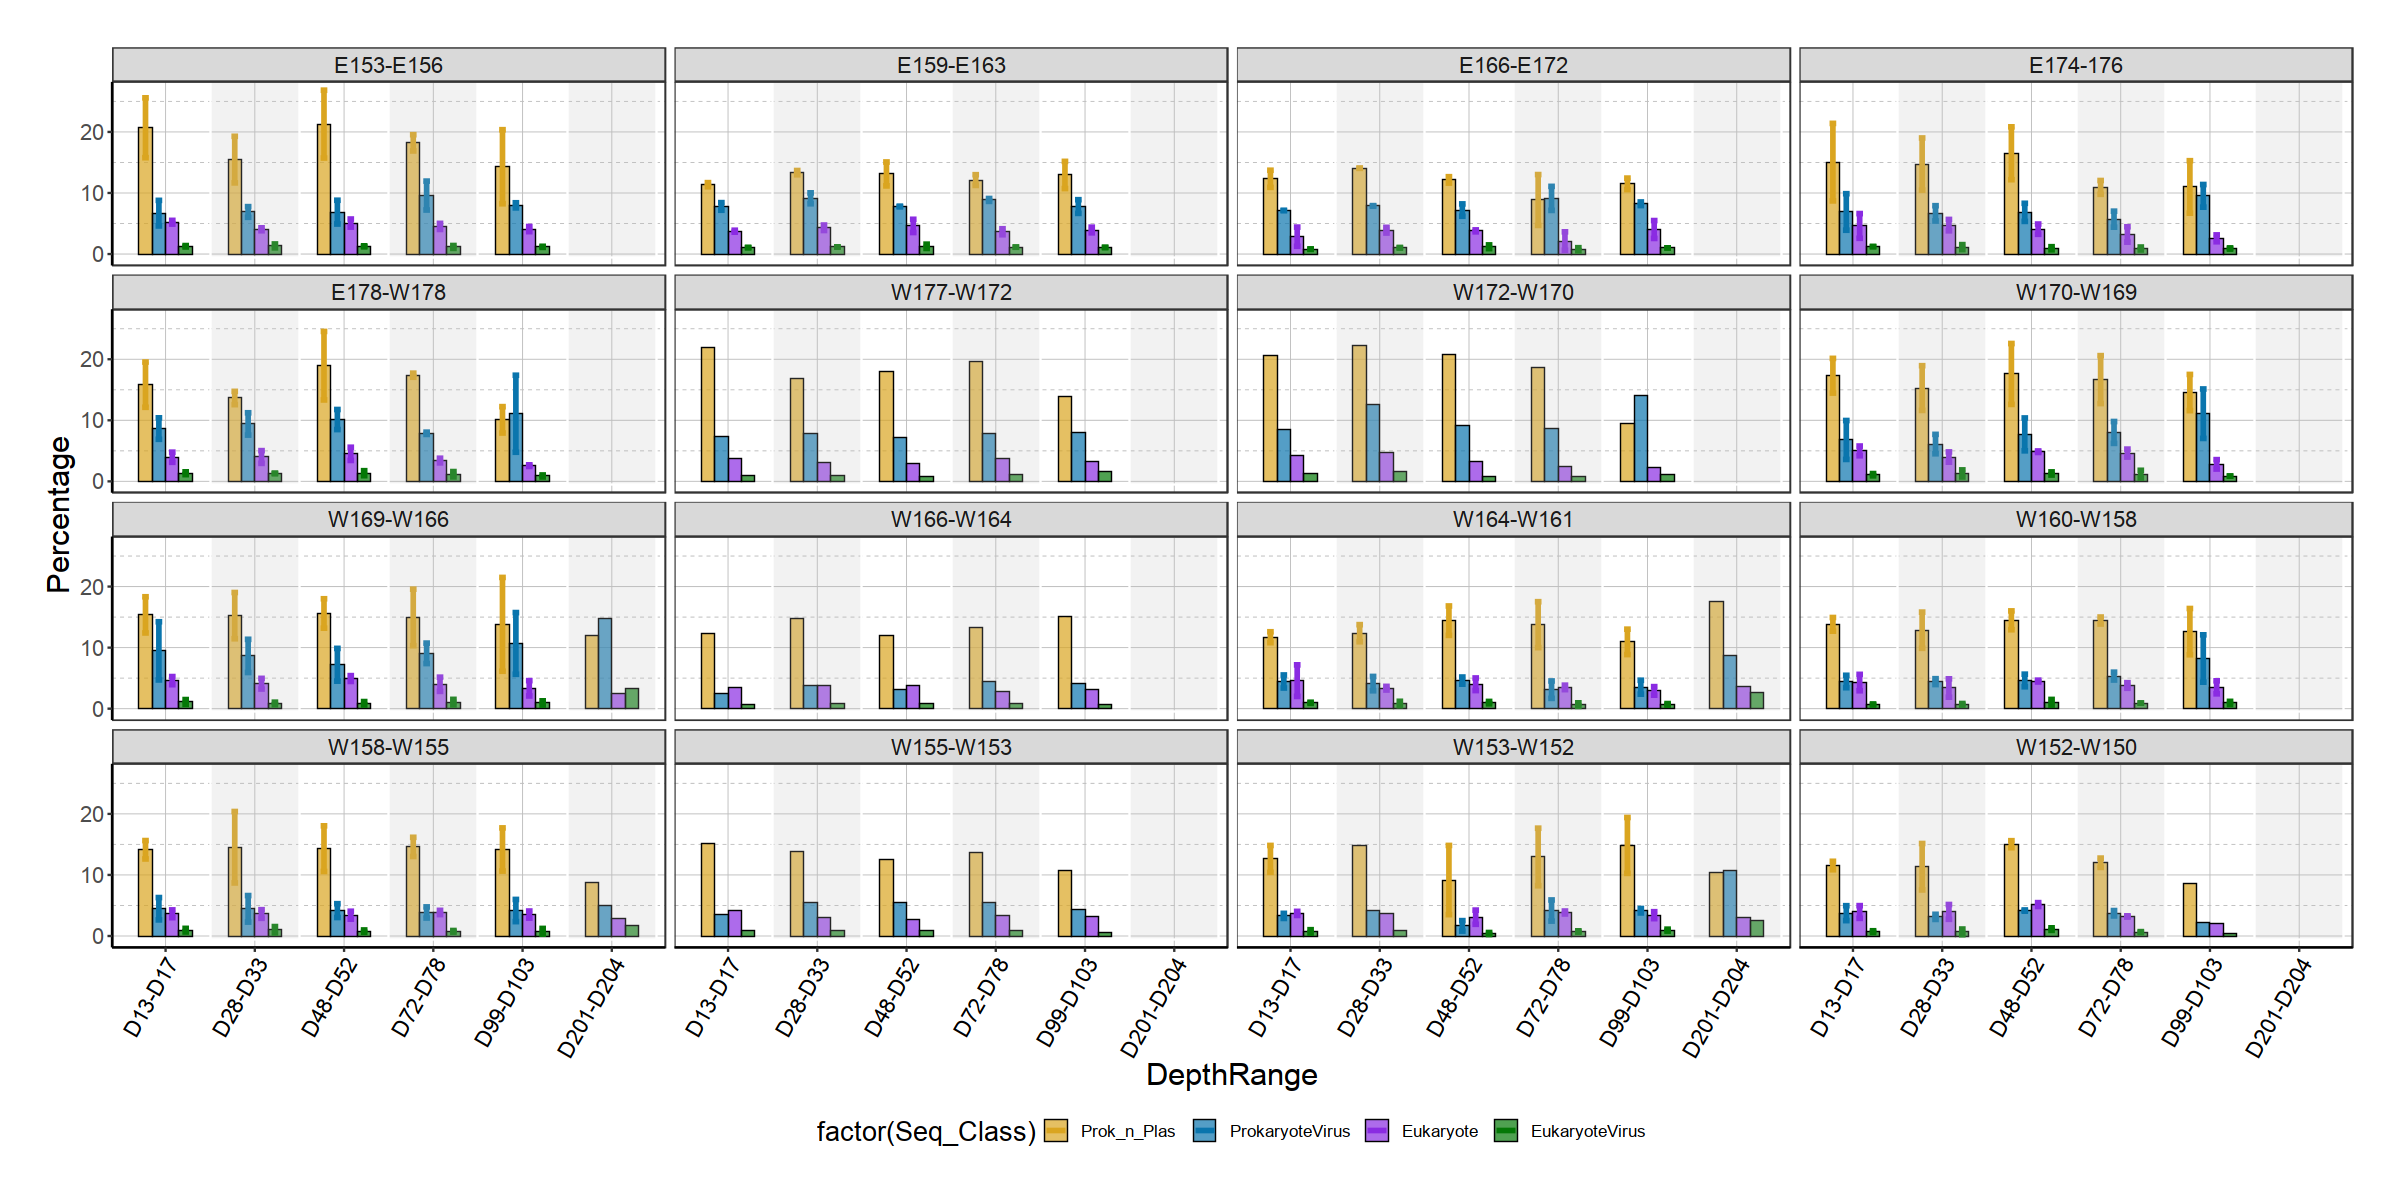

In [311]:
options(repr.plot.width=20, repr.plot.height=10)

ggplot(data=GP13_pct_meta_df2.long.se) +
  geom_bar(mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class)), 
           position=position_dodge(.6), width=0.6, stat="summary", fun="mean", colour="black", size=.3, alpha=0.7) + 
  geom_errorbar(aes(x=DepthRange, ymin=Percentage-sd, ymax=Percentage+sd, color=factor(Seq_Class)), 
           position = position_dodge(width=.6), width=0.3, alpha=1, size=1.2) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2) +
  facet_wrap(~LongitudeRange, nrow = 4) + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))


* Calculate ratios of different percentages 

In [266]:
GP13_pct_meta_df3 <- GP13_pct_meta_df2 %>% 
  mutate(ProkVirProkRatio = ProkaryoteVirus/Prok_n_Plas) %>% 
  mutate(EukVirEukRatio = EukaryoteVirus/Eukaryote) %>% 
  mutate(ProkEukRatio = Prok_n_Plas/Eukaryote) %>% 
  mutate(ProkVirEukVirRatio = ProkaryoteVirus/EukaryoteVirus)
head(GP13_pct_meta_df3, 2)

NCBI_SRA_Acc Collection_Year Collection_Month Collection_Date Cruise_Station
1 SRR5788170   2011            6                6/17/2011       GT14          
2 SRR5788171   2011            6                6/17/2011       GT15          
  Latitude  Longitude Depth Total_Read_Pairs Eukaryote ⋯ Prokaryote
1 -32.46367 -159      101   20106418         2.299047  ⋯ 4.442427  
2 -32.49500 -157       14   29691794         4.312134  ⋯ 9.169389  
  ProkaryoteVirus TotalCnt Prok_n_Plas LongitudeRange DepthRange
1 12.187417       4940804   9.122167   W160-W158      D99-D103  
2  6.574089       8312793  15.830916   W158-W155      D13-D17   
  ProkVirProkRatio EukVirEukRatio ProkEukRatio ProkVirEukVirRatio
1 1.336022         0.4195814      3.967804     12.634197         
2 0.415269         0.2967899      3.671248      5.136818

In [296]:
GP13_pct_meta_df3.long <- GP13_pct_meta_df3 %>% 
  select(LongitudeRange, DepthRange, Depth, ProkVirProkRatio, EukVirEukRatio, ProkEukRatio, ProkVirEukVirRatio) %>% 
  gather(ProkVirProkRatio:ProkVirEukVirRatio, key="Comparison", value="Ratio") %>% 
  mutate(Comparison = factor(Comparison, levels=c("ProkVirProkRatio", "ProkEukRatio", "EukVirEukRatio", "ProkVirEukVirRatio"))) 

head(GP13_pct_meta_df3.long)

LongitudeRange DepthRange Depth Comparison       Ratio    
1 W160-W158      D99-D103   101   ProkVirProkRatio 1.3360221
2 W158-W155      D13-D17     14   ProkVirProkRatio 0.4152690
3 W158-W155      D28-D33     31   ProkVirProkRatio 0.3620093
4 W158-W155      D48-D52     51   ProkVirProkRatio 0.2931608
5 W158-W155      D72-D78     76   ProkVirProkRatio 0.3088302
6 W158-W155      D99-D103   100   ProkVirProkRatio 0.3390061

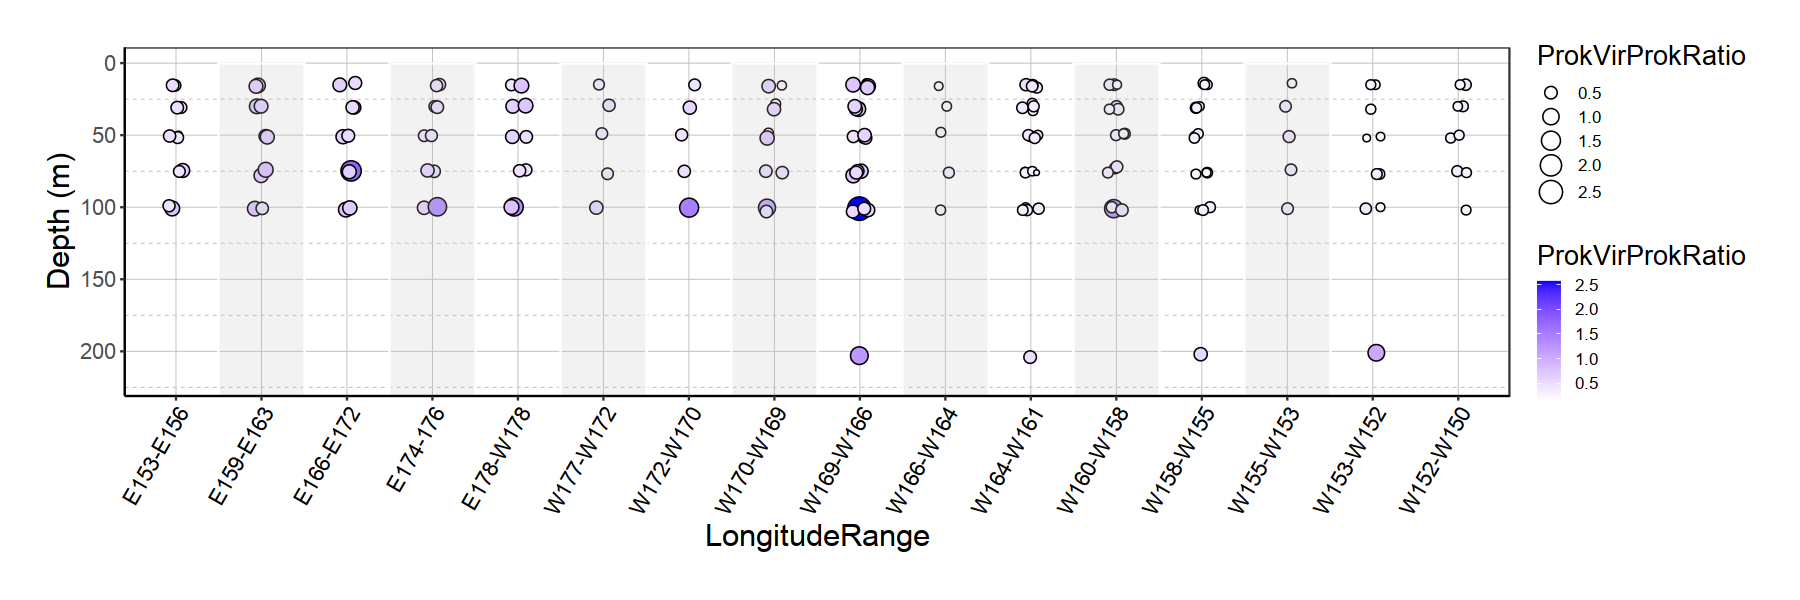

In [340]:
options(repr.plot.width=15, repr.plot.height=5)

ggplot(data=GP13_pct_meta_df3, mapping=aes(x=LongitudeRange, y=Depth, fill=ProkVirProkRatio)) + 
  geom_point(aes(size=ProkVirProkRatio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(220, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_fill_gradient(low = 'white', high = 'blue') +
  #scale_color_gradient2(low = 'blue', mid = 'white', high = 'red') +
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 

ggsave(filename="bioGEOTRACES_DEF_Class_Percentages_GP13_ProkVirProk_ratio_dotplot_v1.pdf", 
       plot = last_plot(), path="./", useDingbats=FALSE,
       scale = 1, width = 300, height = 100, units = "mm",
       dpi = 300, limitsize = FALSE)

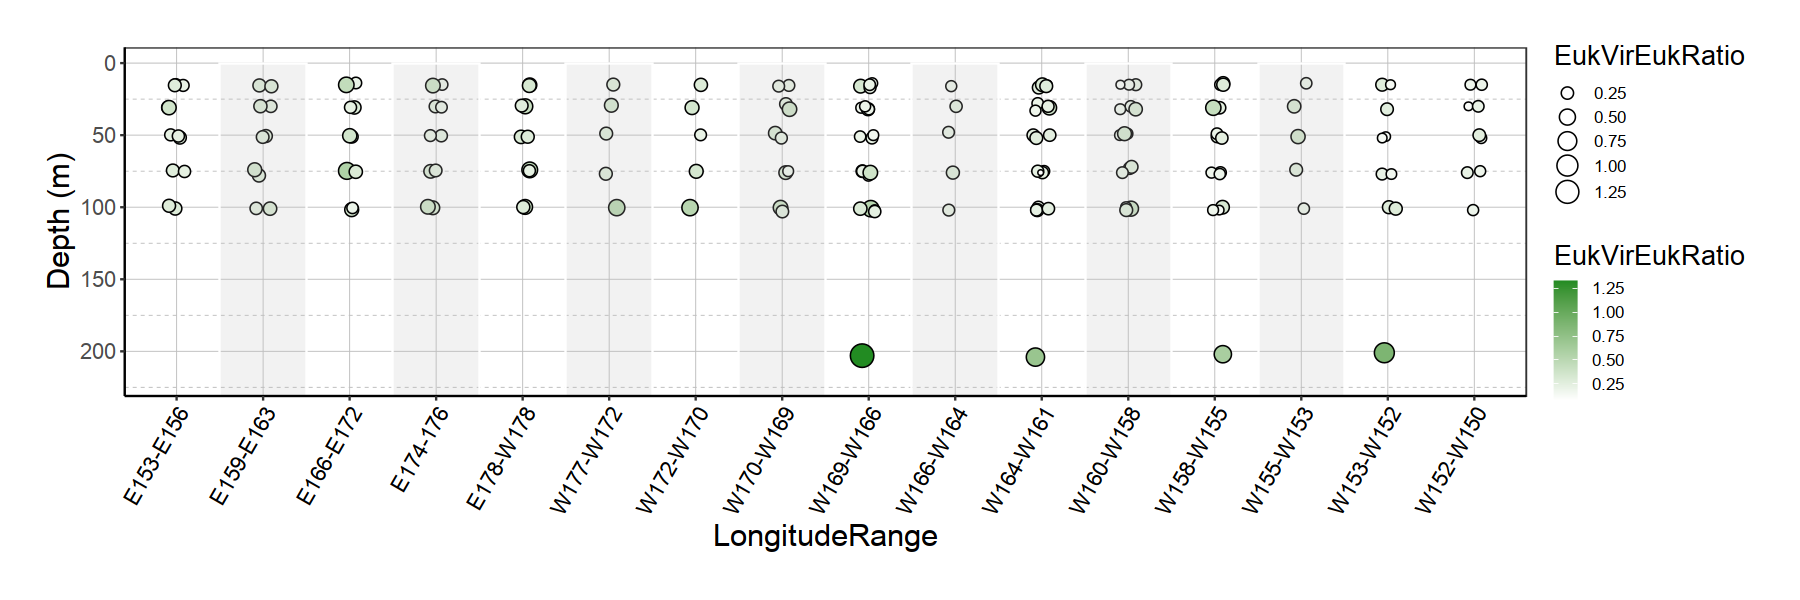

In [342]:
options(repr.plot.width=15, repr.plot.height=5)

ggplot(data=GP13_pct_meta_df3, mapping=aes(x=LongitudeRange, y=Depth, fill=EukVirEukRatio)) + 
  geom_point(aes(size=EukVirEukRatio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(220, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_fill_gradient(low = 'white', high = 'forestgreen') +
  #scale_color_gradient2(low = 'blue', mid = 'white', high = 'red') +
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 

ggsave(filename="bioGEOTRACES_DEF_Class_Percentages_GP13_EukVirEuk_ratio_dotplot_v1.pdf", 
       plot = last_plot(), path="./", useDingbats=FALSE,
       scale = 1, width = 300, height = 100, units = "mm",
       dpi = 300, limitsize = FALSE)

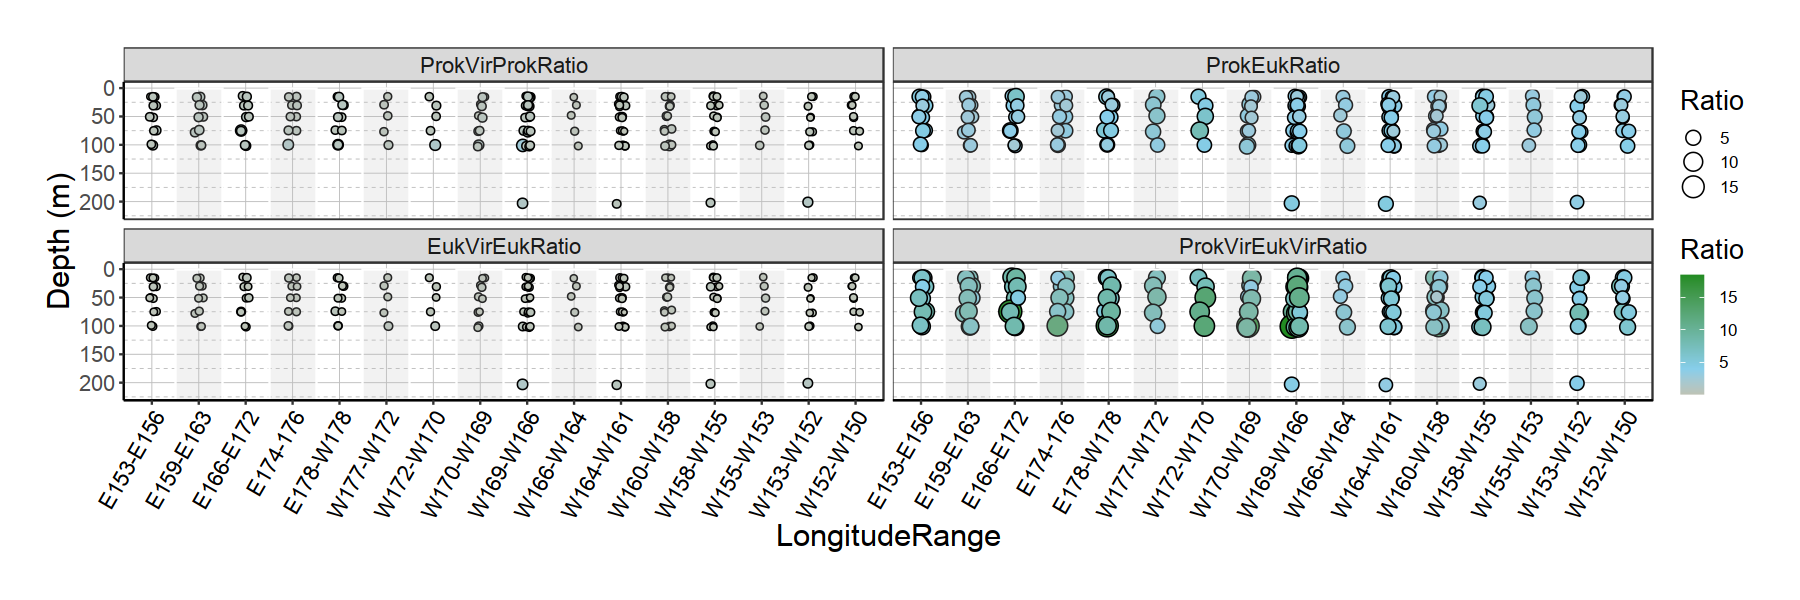

In [300]:
options(repr.plot.width=15, repr.plot.height=5)

ggplot(data=GP13_pct_meta_df3.long, mapping=aes(x=LongitudeRange, y=Depth, fill=Ratio)) + 
  geom_point(aes(size=Ratio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(220, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  #scale_fill_gradient(low = 'yellow', high = 'forestgreen') +
  scale_fill_gradient2(low = 'orange', mid="skyblue", high = 'forestgreen', midpoint = 4) +
  facet_wrap(~Comparison, nrow = 2) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 


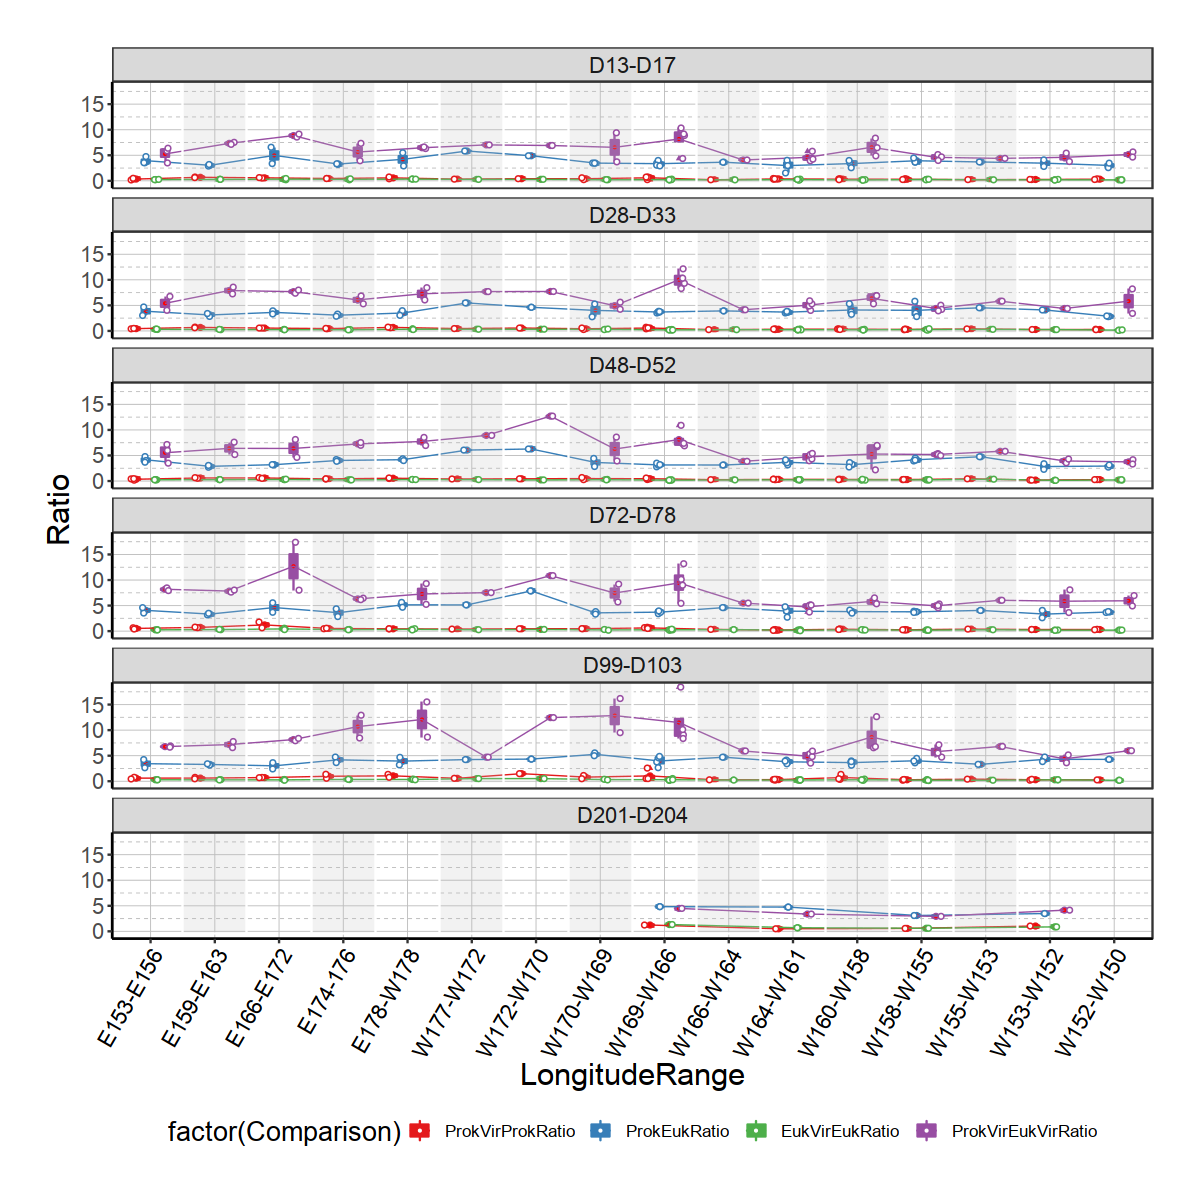

In [273]:
options(repr.plot.width=10, repr.plot.height=10)

pp <- ggplot(data=GP13_pct_meta_df3.long, mapping=aes(x=LongitudeRange, y=Ratio, fill=factor(Comparison), color=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  facet_wrap(~DepthRange, nrow = 6) + 
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) 
pp

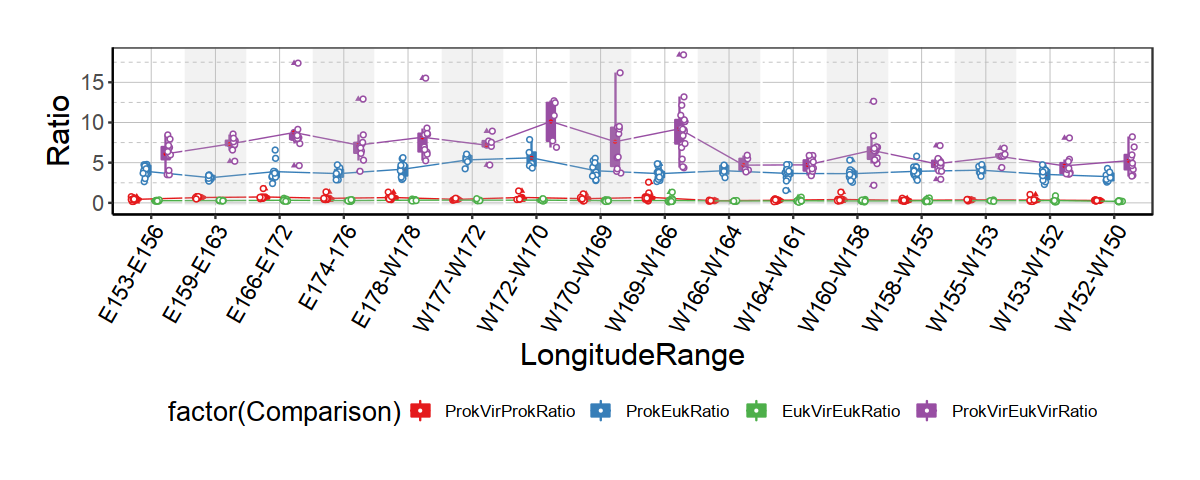

In [274]:
options(repr.plot.width=10, repr.plot.height=4)

pp_2 <- ggplot(data=GP13_pct_meta_df3.long, mapping=aes(x=LongitudeRange, y=Ratio, fill=factor(Comparison),colour=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
pp_2

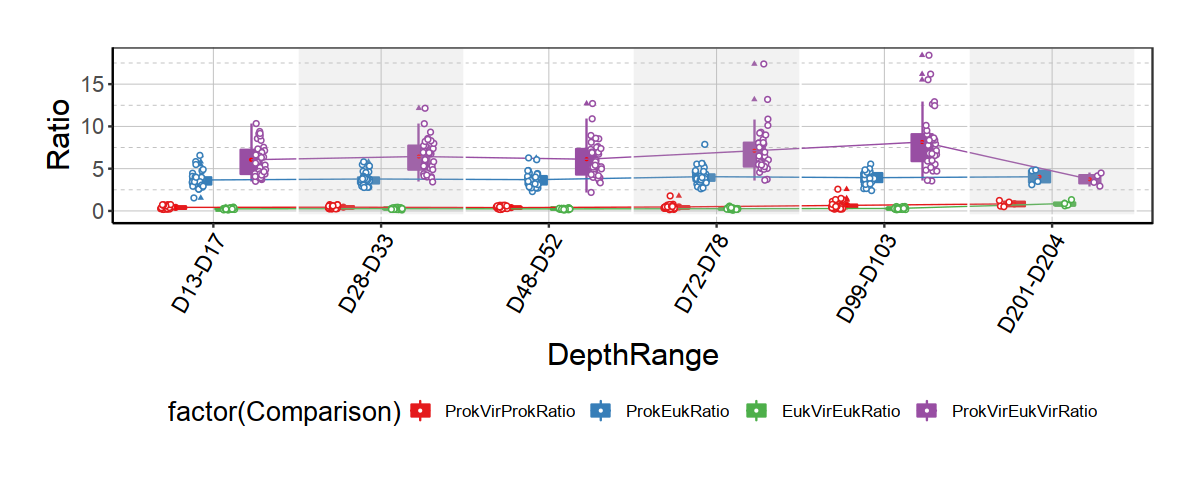

In [275]:
options(repr.plot.width=10, repr.plot.height=4)

pp_3 <- ggplot(data=GP13_pct_meta_df3.long, mapping=aes(x=DepthRange, y=Ratio, fill=factor(Comparison),colour=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
pp_3

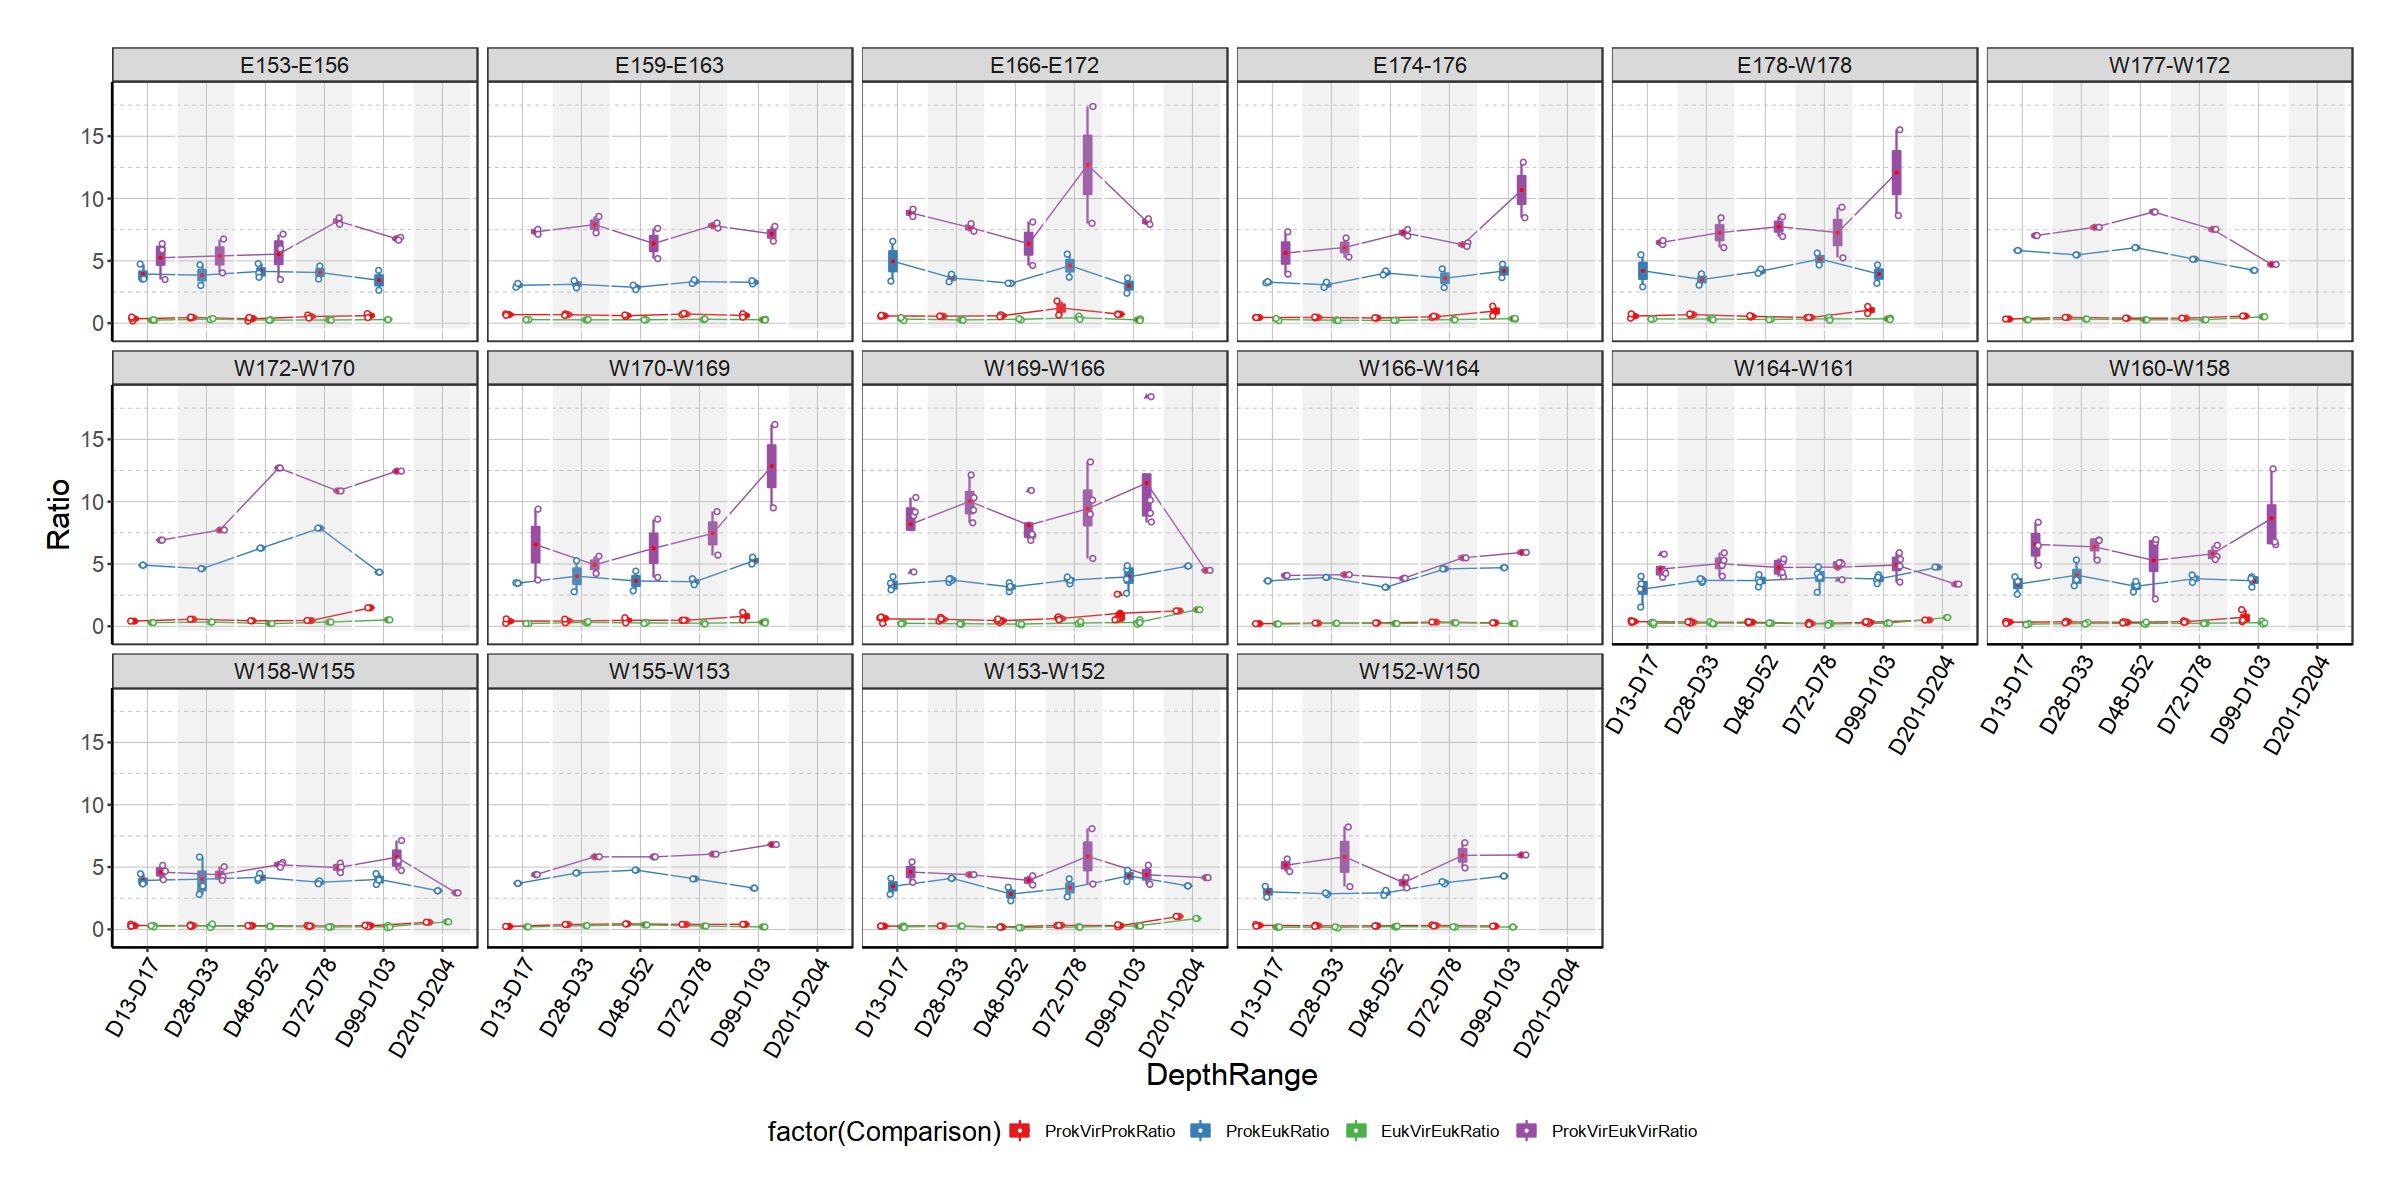

In [276]:
options(repr.plot.width=20, repr.plot.height=10)

pp_4 <- ggplot(data=GP13_pct_meta_df3.long, mapping=aes(x=DepthRange, y=Ratio, fill=factor(Comparison), colour=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + 
  facet_wrap(~LongitudeRange, nrow = 3)
pp_4

## MetaPhlAn3 

In [231]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(SPRING)
library(phyloseq)

In [232]:
# modified from https://www.biostars.org/p/455240/
metaphlanToPhyloseq <- function(
    tax,
    metadat=NULL,
    simplenames=TRUE,
    roundtointeger=FALSE,
    split="|"){
    ## tax is a matrix or data.frame with the table of taxonomic abundances, rows are taxa, columns are samples
    ## metadat is an optional data.frame of specimen metadata, rows are samples, columns are variables
    ## if simplenames=TRUE, use only the most detailed level of taxa names in the final object
    ## if roundtointeger=TRUE, values will be rounded to the nearest integer
    xnames = rownames(tax)
    shortnames = gsub(paste0(".+\\", split), "", xnames)
    if(simplenames){
        rownames(tax) = shortnames
    }
    if(roundtointeger){
        tax = round(tax * 1e4)
    }
    x2 = strsplit(xnames, split=split, fixed=TRUE)
    taxmat = matrix(NA, ncol=max(sapply(x2, length)), nrow=length(x2))
    colnames(taxmat) = c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species", "Strain")[1:ncol(taxmat)]
    rownames(taxmat) = rownames(tax)
    for (i in 1:nrow(taxmat)){
        taxmat[i, 1:length(x2[[i]])] <- x2[[i]]
    }
    taxmat = gsub("[a-z]__", "", taxmat)
    taxmat = phyloseq::tax_table(taxmat)
    otutab = phyloseq::otu_table(tax, taxa_are_rows=TRUE)
    if(is.null(metadat)){
        res = phyloseq::phyloseq(taxmat, otutab)
    }else{
        res = phyloseq::phyloseq(taxmat, otutab, phyloseq::sample_data(metadat))
    }
    return(res)
}

In [233]:
merged_metaphlan_tbl <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_bioGEOTRACES/merged_MetaPhlAn3_BioGEOTRACES_abundance_table.tab"
merged_metaphlan_df <- read.table(merged_metaphlan_tbl, header = T, row.names=1, sep = "\t", as.is = T, strip.white=T, stringsAsFactors = F)
merged_metaphlan_df <- merged_metaphlan_df[, -which(colnames(merged_metaphlan_df) == "NCBI_tax_id")] # remove NCBI_tax_id column
head(merged_metaphlan_df, 4)
#colnames(merged_metaphlan_df)

SRR6507280 
UNKNOWN                                                                                 99.64535000
k__Archaea                                                                               0.03269634
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000000
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000000
                                                                                        SRR6507279
UNKNOWN                                                                                 98.25117  
k__Archaea                                                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000  
                                                                                        SRR6507278 
UNKNOWN                                                                                 99.06114000
k__Archaea                                                                               0.01835311
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000000
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000000
                                                                                        SRR6507277
UNKNOWN                                                                                 97.96894  
k__Archaea                                                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000  
                                                                                        SRR5788468
UNKNOWN                                                                                 99.31169  
k__Archaea                                                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000  
                                                                                        SRR5788467
UNKNOWN                                                                                 99.1026600
k__Archaea                                                                               0.6815456
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.0000000
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.0000000
                                                                                        SRR5788466
UNKNOWN                                                                                 97.47057  
k__Archaea                                                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000  
                                                                                        SRR5788465
UNKNOWN                                                                                 96.9029   
k__Archaea                                                                               0.0000   
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.0000   
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.0000   
                                                                                        SRR5788464  
UNKNOWN          

In [234]:
metadata_file <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_bioGEOTRACES/biogeotraces_metadata_v2.tsv"
metadata_df <- read.table(metadata_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
rownames(metadata_df) <- metadata_df$NCBI_SRA_Acc
head(metadata_df, 2)
unique(metadata_df$Cruise_Series)

Sample_Name Sample_ID Cruise_Series GEOTRACES_Section Cruise_ID
SRR5788236 SRZ187206   S0001     GEOTRACES     GA02              PE319    
SRR5788235 SRZ187207   S0002     GEOTRACES     GA02              PE319    
           Cruise_Station Collection_Date Collection_Year Collection_Month
SRR5788236 10             5/10/2010       2010            5               
SRR5788235 10             5/10/2010       2010            5               
           Collection_Time ⋯ Longitude Bottle_ID NCBI_BioPrj NCBI_SRA_Study
SRR5788236 12:13:00        ⋯ -42.4467  631397    PRJNA385854 SRP110813     
SRR5788235 12:13:00        ⋯ -42.4467  631391    PRJNA385854 SRP110813     
           NCBI_BioSample NCBI_SRA_Acc Total_Read_Pairs Total_Bases
SRR5788236 SAMN07136483   SRR5788236   20058749         6017624700 
SRR5788235 SAMN07136484   SRR5788235   29418997         8825699100 
           NCBI_SRA_Accession_Contigs Assembly_Method  
SRR5788236 SRZ187206                  metaSPAdes v3.9.0
SRR5788235 SRZ187207                  metaSPAdes v3.9.0

[1] "GEOTRACES" "HOT"       "BATS"

In [235]:
ps <- metaphlanToPhyloseq(merged_metaphlan_df, metadat=metadata_df)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

In [236]:
ps.GP13 <- subset_samples(ps, GEOTRACES_Section == "GP13")
ps.GP13

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

In [237]:
ps_rownames <- rownames(sample_data(ps.GP13))
head(ps_rownames)

[1] "SRR5788462" "SRR5788461" "SRR5788460" "SRR5788459" "SRR5788458"
[6] "SRR5788457"

In [238]:
head(GP13_pct_meta_df2, 2)

NCBI_SRA_Acc Collection_Year Collection_Month Collection_Date Cruise_Station
1 SRR5788170   2011            6                6/17/2011       GT14          
2 SRR5788171   2011            6                6/17/2011       GT15          
  Latitude  Longitude Depth Total_Read_Pairs Eukaryote EukaryoteVirus Plasmid 
1 -32.46367 -159      101   20106418         2.299047  0.9646373      4.679740
2 -32.49500 -157       14   29691794         4.312134  1.2797980      6.661527
  Prokaryote ProkaryoteVirus TotalCnt LongitudeRange DepthRange
1 4.442427   12.187417       4940804  W160-W158      D99-D103  
2 9.169389    6.574089       8312793  W158-W155      D13-D17

In [239]:
rownames(GP13_pct_meta_df2) <- GP13_pct_meta_df2$NCBI_SRA_Acc
GP13_pct_meta_df2 <- GP13_pct_meta_df2[ps_rownames,]
sample_data(ps.GP13)$LongitudeRange <- GP13_pct_meta_df2$LongitudeRange
sample_data(ps.GP13)$DepthRange <- GP13_pct_meta_df2$DepthRange
head(sample_data(ps.GP13), 2)

Sample_Name Sample_ID Cruise_Series GEOTRACES_Section Cruise_ID
SRR5788462 SRZ187558   S0373     GEOTRACES     GP13              TAN1109  
SRR5788461 SRZ187559   S0374     GEOTRACES     GP13              TAN1109  
           Cruise_Station Collection_Date Collection_Year Collection_Month
SRR5788462 GT7            6/13/2011       2011            6               
SRR5788461 GT7            6/13/2011       2011            6               
           Collection_Time ⋯ NCBI_BioPrj NCBI_SRA_Study NCBI_BioSample
SRR5788462 12:49:00        ⋯ PRJNA385854 SRP110813      SAMN07136835  
SRR5788461 12:49:00        ⋯ PRJNA385854 SRP110813      SAMN07136836  
           NCBI_SRA_Acc Total_Read_Pairs Total_Bases NCBI_SRA_Accession_Contigs
SRR5788462 SRR5788462   27975409         8392622700  SRZ187558                 
SRR5788461 SRR5788461   28820623         8646186900  SRZ187559                 
           Assembly_Method   LongitudeRange DepthRange
SRR5788462 metaSPAdes v3.9.0 W166-W164      D28-D33   
SRR5788461 metaSPAdes v3.9.0 W166-W164      D48-D52

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 41 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 41 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


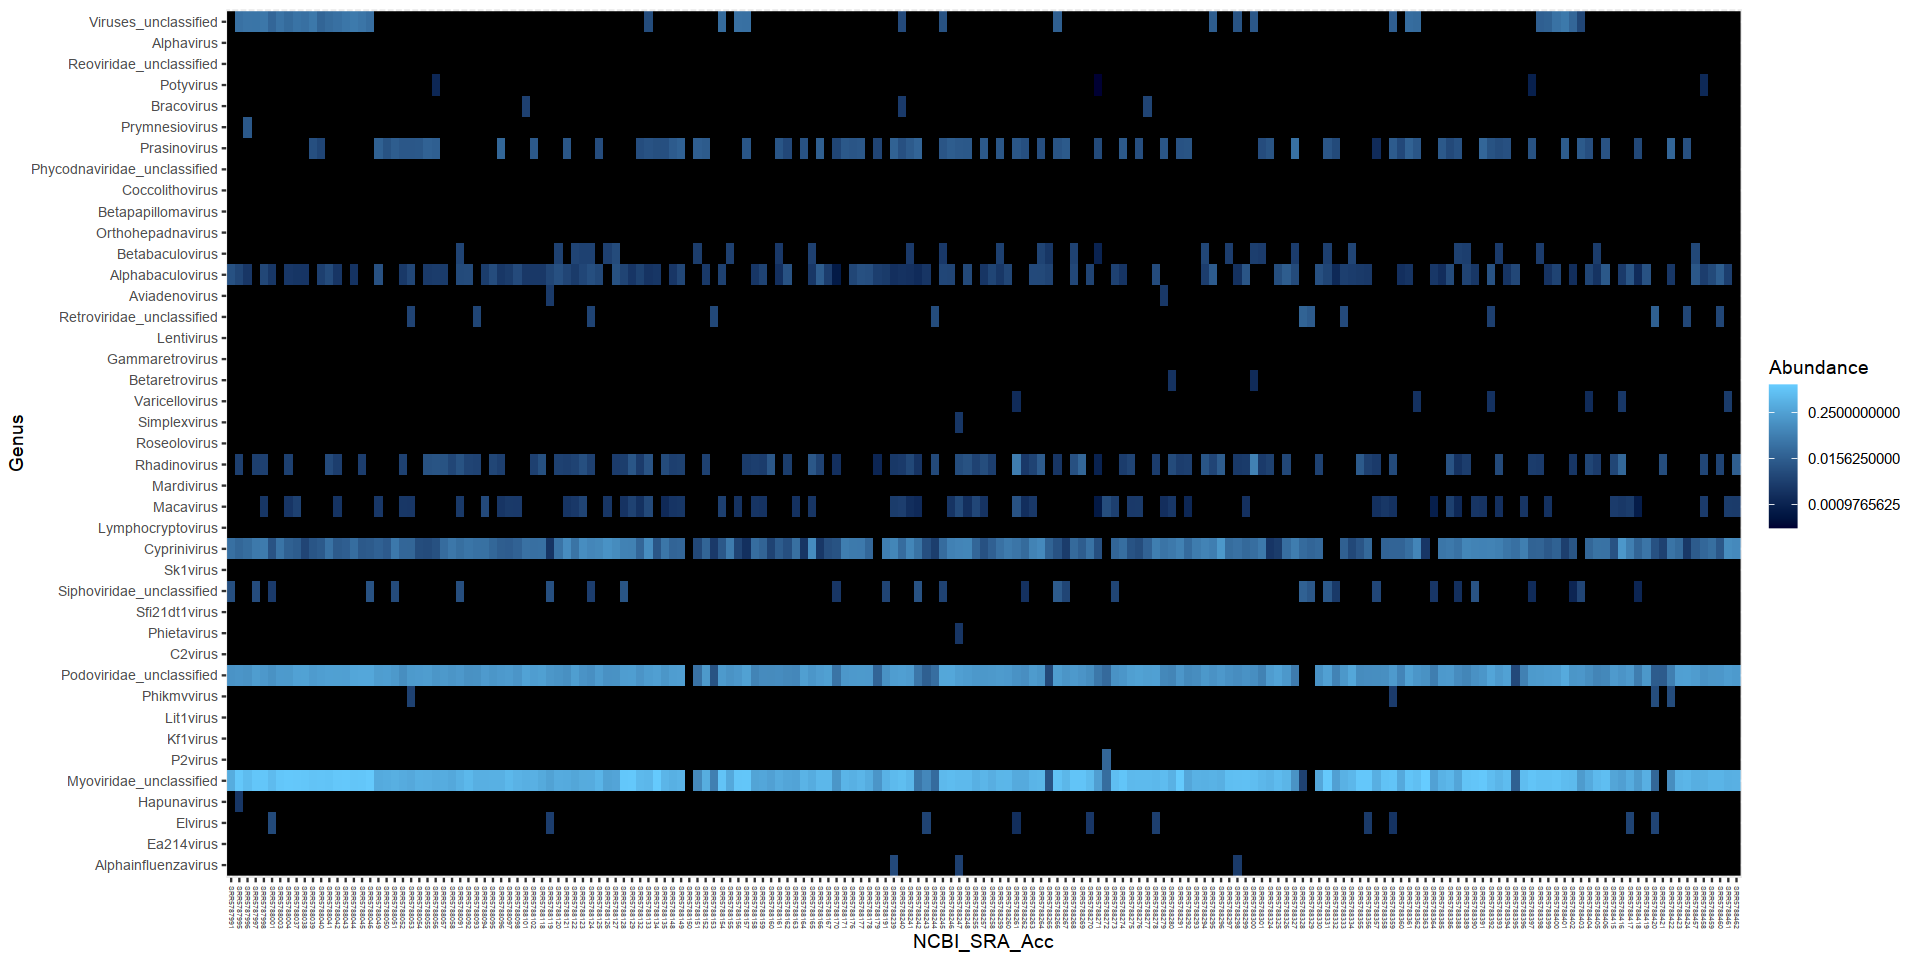

In [240]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.vir <- subset_taxa(ps.GP13, Kingdom == "Viruses")
ps.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.vir.genus <- subset_taxa(ps.vir, is.na(Species) & !is.na(Genus))
ps.vir.genus

plot_heatmap(ps.vir.genus,
             taxa.label="Genus", 
             taxa.order="Genus",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


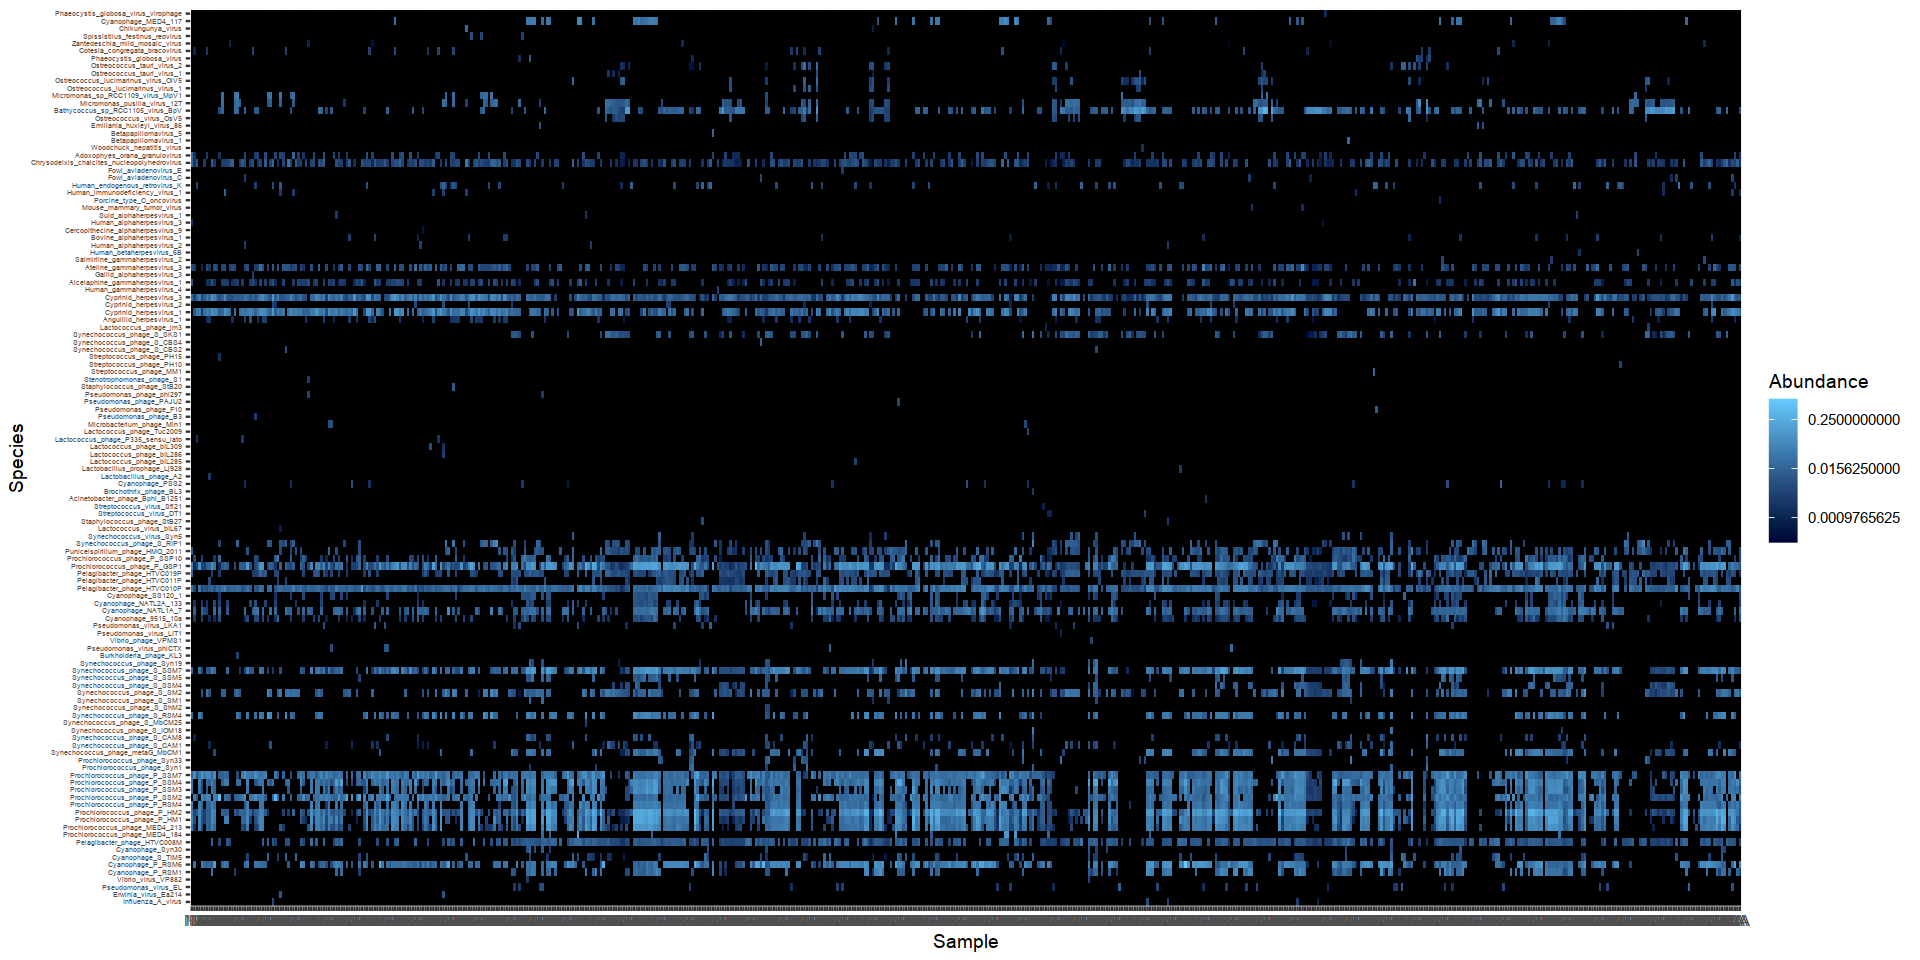

In [172]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.vir <- subset_taxa(ps, Kingdom == "Viruses")
ps.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.vir.species <- subset_taxa(ps.vir, !is.na(Species))
ps.vir.species

plot_heatmap(ps.vir.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

In [312]:
library(NetCoMi)

Loading required package: SpiecEasi





In [313]:
# keep only species with sum abundance >= 1e-1 across samples
ps.vir.species.fil <- prune_taxa(taxa_sums(ps.vir.species) >= 0.06, ps.vir.species)
# keep only samples with sum abundance >= 1e-1 across taxa
ps.vir.species.fil <- prune_samples(sample_sums(ps.vir.species.fil) >= 0.06, ps.vir.species.fil)

net_single_vir <- netConstruct(ps.vir.species.fil,
                           #filtTax = "highestFreq",
                           #filtTaxPar = list(highestFreq = 100),
                           #filtSamp = "totalReads",
                           #filtSampPar = list(totalReads = 0.01),
                           measure = "spring", # "pearson",
                           #measurePar = list(nlambda=10, 
                           #                  rep.num=10),
                           normMethod = "clr", 
                           zeroMethod = "multRepl",
                           sparsMethod = "threshold", 
                           thresh = 0.3,
                           dissFunc = "signed",
                           verbose = 3,
                           seed = 123456)

Infos about changed arguments:

Zero handling included in 'spring'.
Normalization ignored for measure 'spring'.
Sparsification included in 'spring'.


58 taxa and 574 samples remaining.


Calculate 'spring' associations ... 




The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann grap

Done.



In [314]:
props_single_vir <- netAnalyze(net_single_vir, 
                           centrLCC = TRUE,
                           avDissIgnoreInf = TRUE,
                           sPathNorm = FALSE,
                           clustMethod = "cluster_fast_greedy",
                           hubPar = "eigenvector", # hubPar = c("degree", "between", "closeness"),
                           hubQuant = 0.9,
                           lnormFit = TRUE,
                           weightDeg = FALSE, 
                           normBetw = FALSE,
                           normClose = FALSE,
                           normEigen = FALSE,
                           normDeg = FALSE)

#?summary.microNetProps
#summary(props_single_vir, numbNodes = 5L)

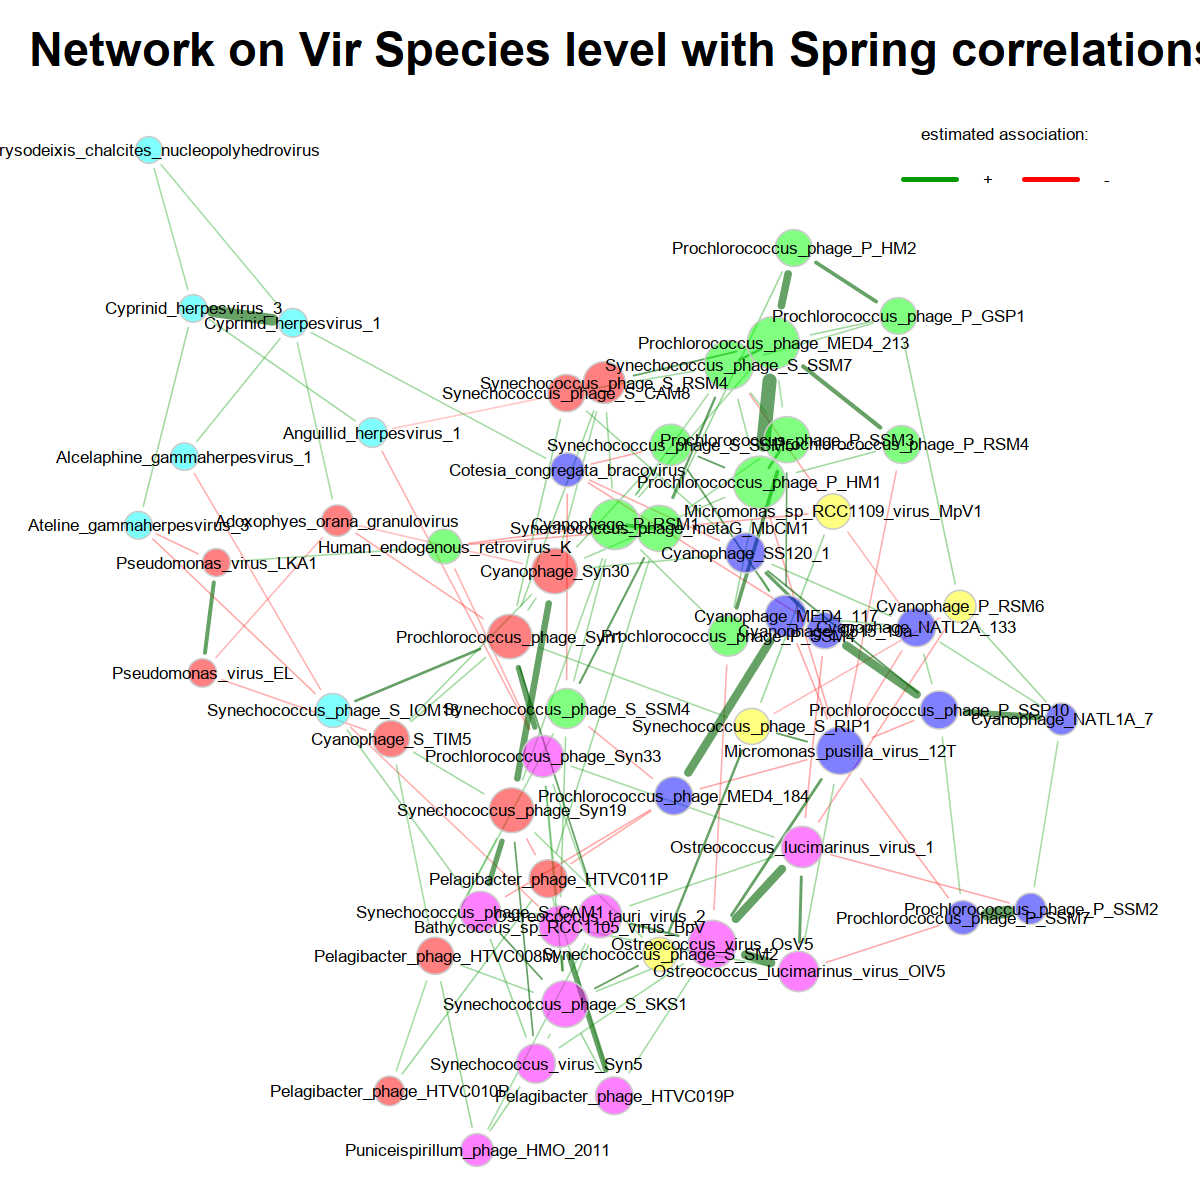

In [315]:
options(repr.plot.width=10, repr.plot.height=10)

p_vir <- plot(props_single_vir,
          layout = "layout_with_fr",
          labelScale = FALSE,
          rmSingles = TRUE,
          shortenLabels = "simple",
          labelLength = 50,
          charToRm = "s__",
          nodeColor = "cluster", 
          nodeSize = "eigenvector", # clr
          nodeSizeSpread = 3,
          hubBorderCol = "black",
          repulsion = 0.8,
          cexNodes = 3,
          cexLabels = 0.8,
          cexHubLabels = 1,
          title1 = "Network on Vir Species level with Spring correlations", 
          showTitle = TRUE,
          cexTitle = 2.3, 
          edgeTranspLow = 60, 
          edgeTranspHigh = 40,
          nodeTransp = 50, 
          hubTransp = 30
         )


legend(0.6, 1.1, cex = 0.8, title = "estimated association:",
       legend = c("+","-"), lty = 1, lwd = 3, col = c("#009900","red"), 
       bty = "n", horiz = TRUE)

In [241]:
options(repr.plot.width=16, repr.plot.height=8)

# select all prokaryotes
ps.prok <- subset_taxa(ps.GP13, Kingdom %in% c("Bacteria", "Archaea"))
ps.prok

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.prok.species <- subset_taxa(ps.prok, !is.na(Species))
ps.prok.species

# get HOT Prokaryotes abundance table
prok_species_abund <- t(otu_table(ps.prok.species))
ncol(prok_species_abund)
# colnames(HOT_pro_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(prok_species_abund) >= 1e-1
prok_species_abund <- prok_species_abund[, keep_cols]
ncol(prok_species_abund)
head(prok_species_abund, 2)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 283 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 283 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 111 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 111 taxa by 7 taxonomic ranks ]

[1] 111

[1] 14

s__Candidatus_Nitrosopelagicus_brevis
SRR5788462 0                                    
SRR5788461 0                                    
           s__Thaumarchaeota_archaeon_SCGC_AC_337_F14 s__Croceibacter_sp
SRR5788462 0                                          0                 
SRR5788461 0                                          0                 
           s__Prochlorococcus_marinus s__Synechococcus_sp_WH_8109
SRR5788462 1.244421                   0                          
SRR5788461 1.446734                   0                          
           s__Alphaproteobacteria_bacterium_MarineAlpha3_Bin2
SRR5788462 0                                                 
SRR5788461 0                                                 
           s__Alphaproteobacteria_bacterium_MarineAlpha3_Bin6
SRR5788462 0                                                 
SRR5788461 0                                                 
           s__Sulfitobacter_pontiacus s__Pseudoalteromonas_agarivorans
SRR5788462 0                          0                               
SRR5788461 0                          0                               
           s__Pseudoalteromonas_tetraodonis s__Oceanobacter_sp
SRR5788462 0                                0                 
SRR5788461 0                                0                 
           s__Acinetobacter_johnsonii s__Pseudomonas_putida_group
SRR5788462 0                          0                          
SRR5788461 0                          0                          
           s__Roseibacillus_sp
SRR5788462 0.03088567         
SRR5788461 0.01977478

In [174]:
options(repr.plot.width=16, repr.plot.height=8)

# select all prokaryotes
ps.prok <- subset_taxa(ps.GP13, Kingdom %in% c("Bacteria", "Archaea"))
ps.prok

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.prok.species <- subset_taxa(ps.prok, !is.na(Species))
ps.prok.species

# get HOT Prokaryotes abundance table
prok_species_abund <- t(otu_table(ps.prok.species))
ncol(prok_species_abund)
# colnames(HOT_pro_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(prok_species_abund) >= 1e-1
prok_species_abund <- prok_species_abund[, keep_cols]
ncol(prok_species_abund)
head(prok_species_abund, 2)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 283 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 283 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 111 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 111 taxa by 7 taxonomic ranks ]

[1] 111

[1] 14

s__Candidatus_Nitrosopelagicus_brevis
SRR5788462 0                                    
SRR5788461 0                                    
           s__Thaumarchaeota_archaeon_SCGC_AC_337_F14 s__Croceibacter_sp
SRR5788462 0                                          0                 
SRR5788461 0                                          0                 
           s__Prochlorococcus_marinus s__Synechococcus_sp_WH_8109
SRR5788462 1.244421                   0                          
SRR5788461 1.446734                   0                          
           s__Alphaproteobacteria_bacterium_MarineAlpha3_Bin2
SRR5788462 0                                                 
SRR5788461 0                                                 
           s__Alphaproteobacteria_bacterium_MarineAlpha3_Bin6
SRR5788462 0                                                 
SRR5788461 0                                                 
           s__Sulfitobacter_pontiacus s__Pseudoalteromonas_agarivorans
SRR5788462 0                          0                               
SRR5788461 0                          0                               
           s__Pseudoalteromonas_tetraodonis s__Oceanobacter_sp
SRR5788462 0                                0                 
SRR5788461 0                                0                 
           s__Acinetobacter_johnsonii s__Pseudomonas_putida_group
SRR5788462 0                          0                          
SRR5788461 0                          0                          
           s__Roseibacillus_sp
SRR5788462 0.03088567         
SRR5788461 0.01977478

In [250]:
library("RColorBrewer")

# sort abundance table accroding to sample metadata
# the metadata has to be in data.frame, not phyloseq sample.data format
sample_metadata <- data.frame(sample_data(ps.GP13)[, c("DepthRange", "LongitudeRange")])
sample_metadata <- with(sample_metadata, sample_metadata[order(LongitudeRange, DepthRange),])
depth_levels <- levels(sample_metadata$DepthRange)
depth_colors <- setNames(colorRampPalette(brewer.pal(9, "BuPu"))(length(depth_levels)), depth_levels)
longitude_levels <- levels(sample_metadata$LongitudeRange)
longitude_colors <- setNames(colorRampPalette(brewer.pal(11, "RdYlGn"))(length(longitude_levels)), longitude_levels)


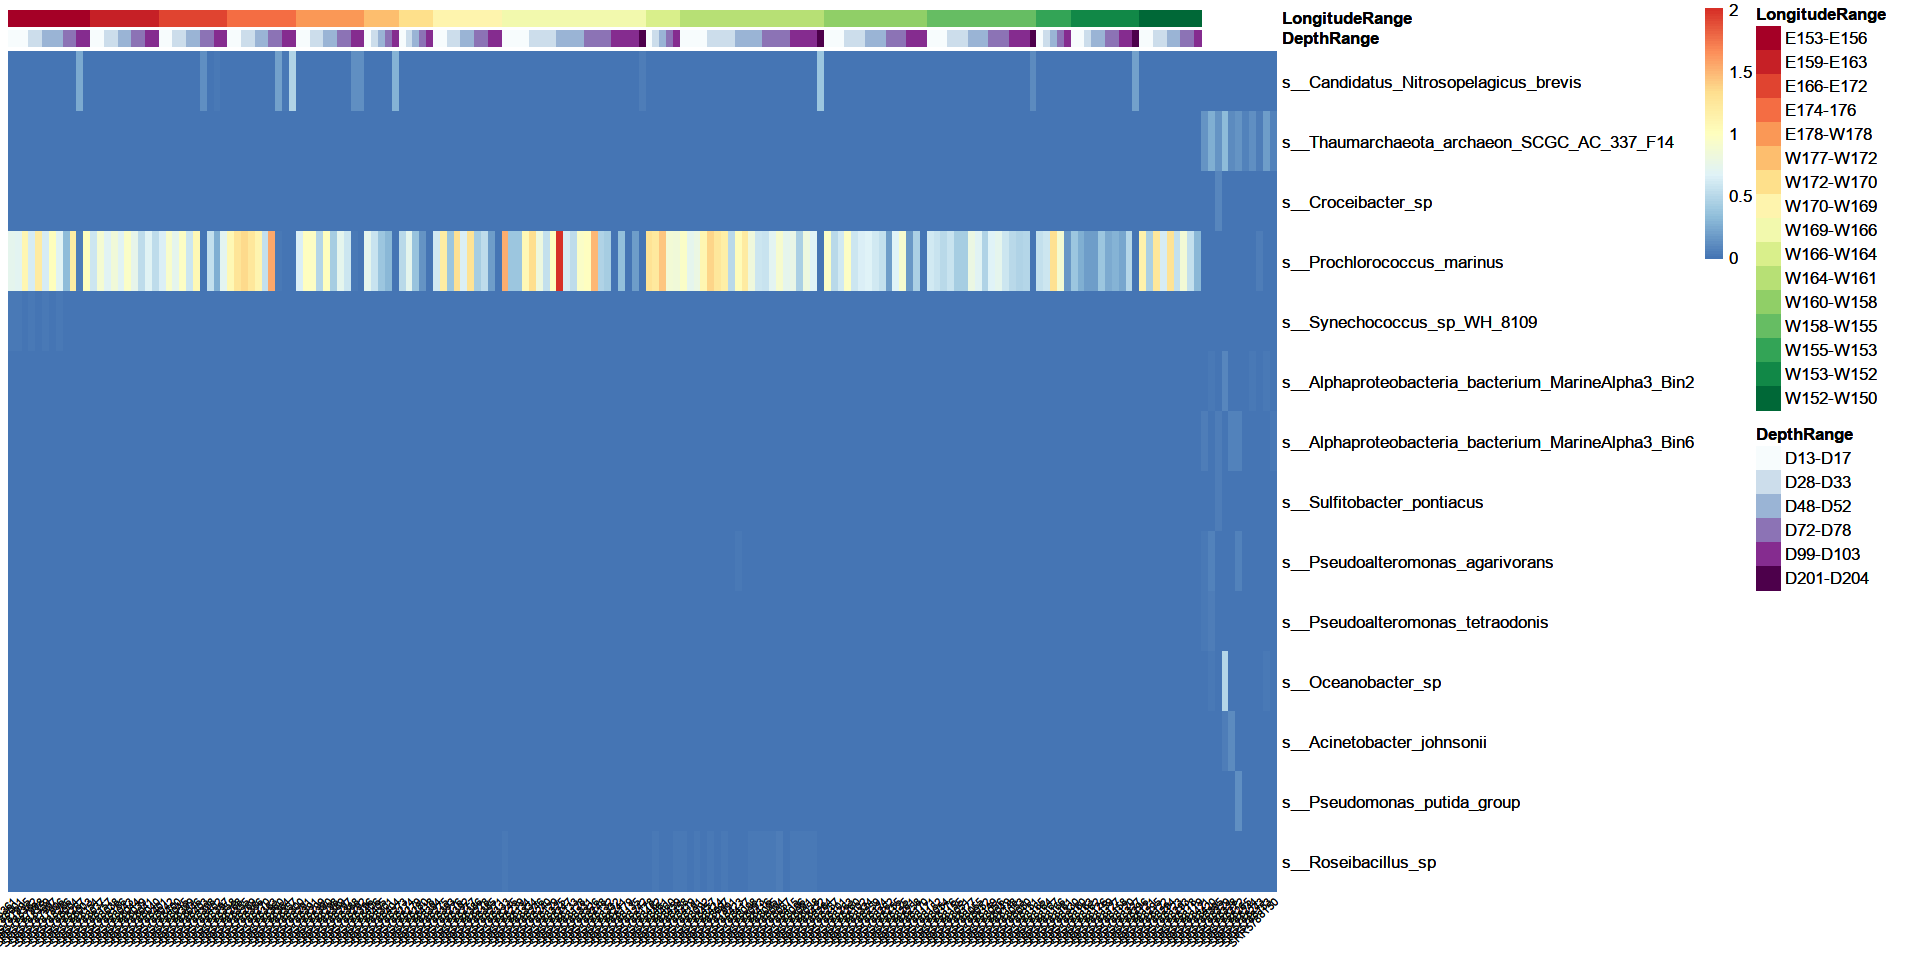

In [252]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
prok_species_abund.t <- t(prok_species_abund)
prok_species_abund.t <- prok_species_abund.t[, rownames(sample_metadata)]
pheat.prok <- pheatmap(prok_species_abund.t, 
         #legend_breaks = 0:3, legend_labels = paste('1e', 0:3, sep=''), 
         cluster_cols = F, 
         cluster_rows = F, 
         annotation_col = sample_metadata,     
         annotation_colors = list(
             DepthRange = depth_colors,
             LongitudeRange = longitude_colors),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

print(pheat.prok)

In [253]:
# get HOT Prokaryotes abundance table
vir_species_abund <- t(otu_table(ps.vir.species))
ncol(vir_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(vir_species_abund) >= 1e-1
vir_species_abund <- vir_species_abund[, keep_cols]
ncol(vir_species_abund)
head(vir_species_abund, 2)

[1] 120

[1] 54

s__Pseudomonas_virus_EL s__Cyanophage_P_RSM1 s__Cyanophage_P_RSM6
SRR6507280 0                       0.005081844          0.05778194          
SRR6507279 0                       0.018783255          0.00000000          
           s__Cyanophage_S_TIM5 s__Cyanophage_Syn30
SRR6507280 0                    0                  
SRR6507279 0                    0                  
           s__Pelagibacter_phage_HTVC008M s__Prochlorococcus_phage_MED4_184
SRR6507280 0.00372178                     0                                
SRR6507279 0.00000000                     0                                
           s__Prochlorococcus_phage_MED4_213 s__Prochlorococcus_phage_P_HM1
SRR6507280 0.001920383                       0.005908225                   
SRR6507279 0.017673626                       0.008942267                   
           s__Prochlorococcus_phage_P_HM2 ⋯ s__Human_endogenous_retrovirus_K
SRR6507280 0.00806158                     ⋯ 0                               
SRR6507279 0.03256924                     ⋯ 0                               
           s__Chrysodeixis_chalcites_nucleopolyhedrovirus
SRR6507280 0.001882612                                   
SRR6507279 0.011484884                                   
           s__Adoxophyes_orana_granulovirus s__Ostreococcus_virus_OsV5
SRR6507280 0.001453232                      0                         
SRR6507279 0.000000000                      0                         
           s__Bathycoccus_sp_RCC1105_virus_BpV s__Micromonas_pusilla_virus_12T
SRR6507280 0.004839863                         0                              
SRR6507279 0.000000000                         0                              
           s__Micromonas_sp_RCC1109_virus_MpV1
SRR6507280 0                                  
SRR6507279 0                                  
           s__Ostreococcus_lucimarinus_virus_OlV5 s__Ostreococcus_tauri_virus_2
SRR6507280 0                                      0                            
SRR6507279 0                                      0                            
           s__Cyanophage_MED4_117
SRR6507280 0                     
SRR6507279 0

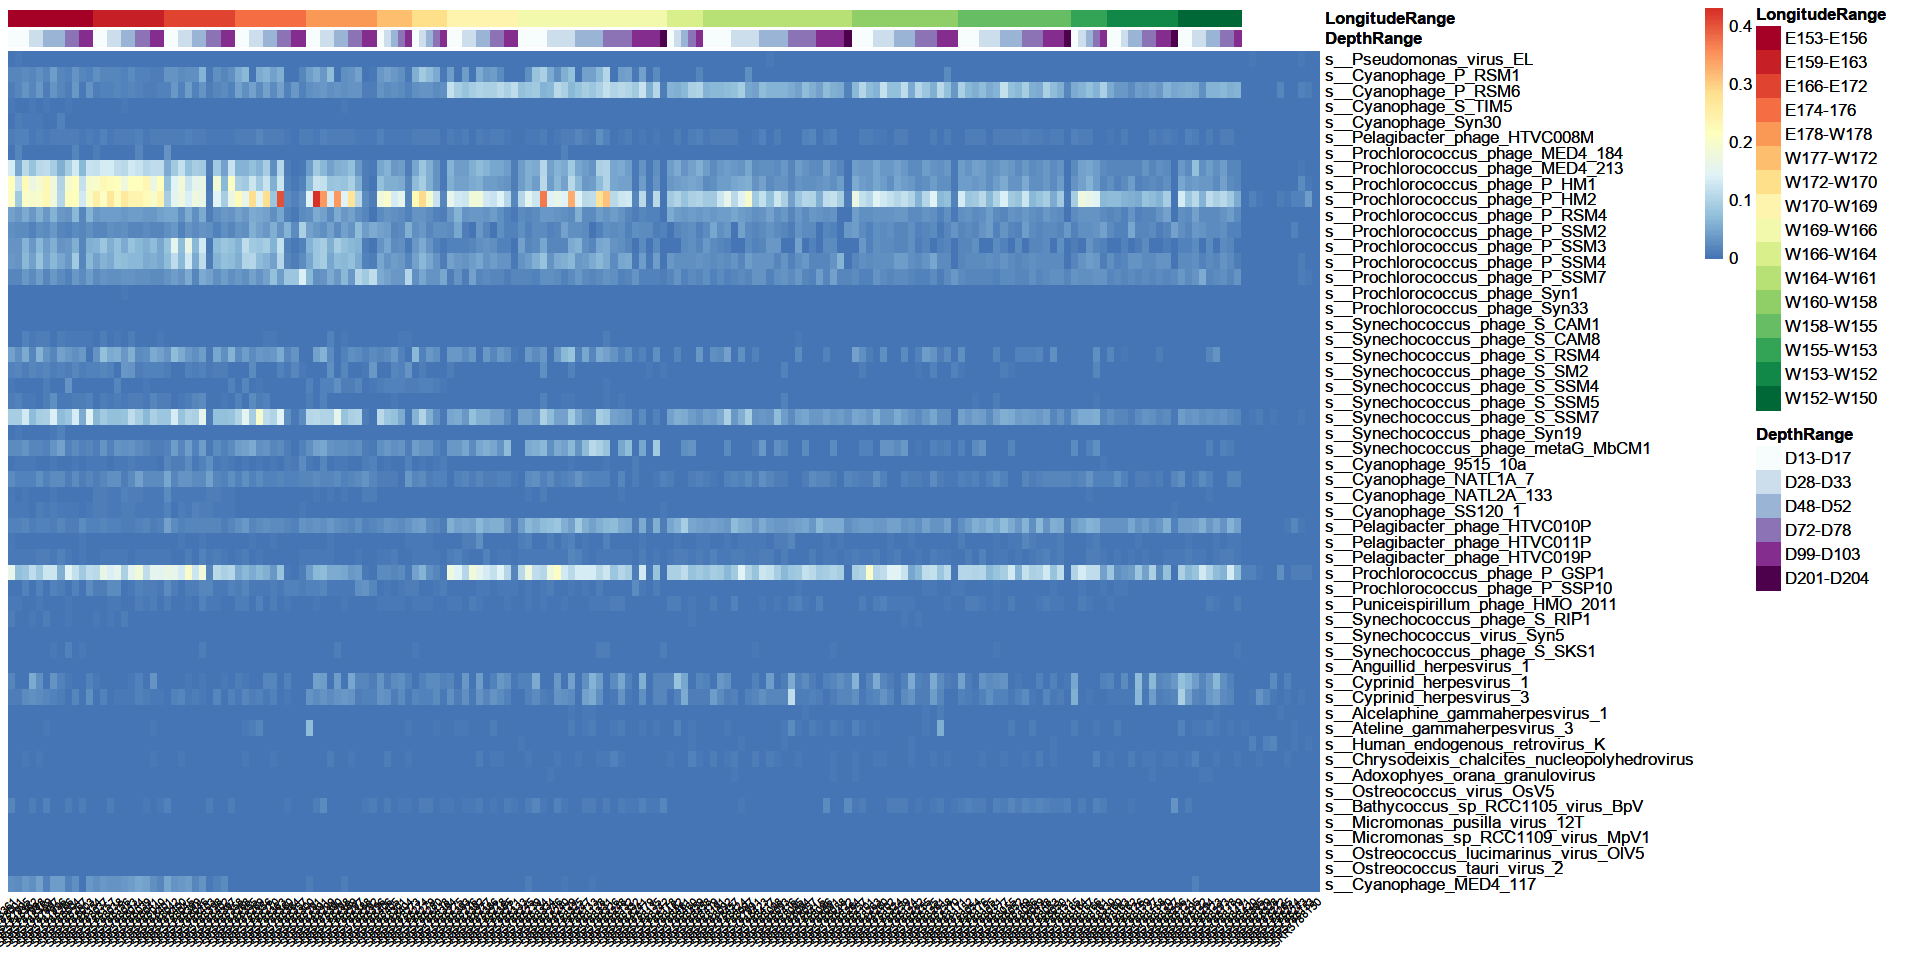

In [255]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
vir_species_abund.t <- t(vir_species_abund)
vir_species_abund.t <- vir_species_abund.t[, rownames(sample_metadata)]
pheat.vir <- pheatmap(vir_species_abund.t, 
         #legend_breaks = 0:3, legend_labels = paste('1e', 0:3, sep=''), 
         cluster_cols = F, 
         cluster_rows = F, 
         annotation_col = sample_metadata,     
         annotation_colors = list(
             DepthRange = depth_colors,
             LongitudeRange = longitude_colors),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

print(pheat.vir)

### Calculate cyanophage/cyano ratios

In [348]:
ps.vir <- subset_taxa(ps, Kingdom=="Viruses")
cyanophage_rows <- grepl(pattern = "Prochlorococcus_phage|Synechococcus_phage|Cyanophage", rownames(otu_table(ps.vir)))
cyanophage_df <- otu_table(ps.vir)[cyanophage_rows]
head(cyanophage_df, 2)
dim(cyanophage_df)

SRR6507280  SRR6507279 SRR6507278 SRR6507277 SRR5788468
s__Cyanophage_P_RSM1 0.005081844 0.01878326 0.0000000  0.00000000 0.01216154
s__Cyanophage_P_RSM6 0.057781941 0.00000000 0.1818652  0.01664047 0.00000000
                     SRR5788467 SRR5788466 SRR5788465 SRR5788464  SRR5788463 ⋯
s__Cyanophage_P_RSM1 0          0.02742717 0.02473471 0.004162171 0.02037199 ⋯
s__Cyanophage_P_RSM6 0          0.01427891 0.01623037 0.032868511 0.04522107 ⋯
                     SRR5720228 SRR5720227 SRR5720226 SRR5720225 SRR5720224
s__Cyanophage_P_RSM1 0.0000000  0.02594795 0.0000000  0.00000000 0.00000000
s__Cyanophage_P_RSM6 0.1487366  0.01229380 0.0183599  0.01200906 0.01787163
                     SRR5720223 SRR5720222 SRR5720221 SRR5720220 SRR5720219
s__Cyanophage_P_RSM1 0.00000000 0          0          0.00000000 0         
s__Cyanophage_P_RSM6 0.04214065 0          0          0.02600587 0

[1]  40 610

In [349]:
ps.synechococcales <- subset_taxa(ps, Order=="Synechococcales")
ps.synechococcales
synechococcales_df <- otu_table(ps.synechococcales)
head(synechococcales_df, 2)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 20 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 20 taxa by 7 taxonomic ranks ]

SRR6507280  SRR6507279 SRR6507278 SRR6507277 SRR5788468
o__Synechococcales 0.005118657 1.342975   0.1479083  1.058334   0.1853293 
f__Prochloraceae   0.005118657 1.342975   0.1479083  1.058334   0.1835387 
                   SRR5788467  SRR5788466 SRR5788465 SRR5788464 SRR5788463 ⋯
o__Synechococcales 0.001305636 1.387562   1.666974   0.1075107  0.5104696  ⋯
f__Prochloraceae   0.001305636 1.381370   1.660997   0.1075107  0.5082437  ⋯
                   SRR5720228 SRR5720227 SRR5720226 SRR5720225 SRR5720224
o__Synechococcales 0.357406   2.011347   0.01770883 0.05439721 0         
f__Prochloraceae   0.357406   2.011347   0.01770883 0.05439721 0         
                   SRR5720223 SRR5720222 SRR5720221 SRR5720220  SRR5720219
o__Synechococcales 0.01351203 2.913534   0          0.003359523 2.049058  
f__Prochloraceae   0.01351203 2.913534   0          0.003359523 2.049058

In [350]:
cyanophage_cyano_df <- data.frame(cyano=colSums(synechococcales_df), cyanophage=colSums(cyanophage_df))
cyanophage_cyano_df["ratio"] <- cyanophage_cyano_df$cyanophage / cyanophage_cyano_df$cyano
cyanophage_cyano_df[cyanophage_cyano_df == Inf] <- NA
head(cyanophage_cyano_df)

cyano       cyanophage ratio      
SRR6507280 0.020474629 0.24978412 12.19968925
SRR6507279 5.371899359 0.27929907  0.05199261
SRR6507278 0.591633252 0.65950582  1.11472068
SRR6507277 4.233337149 0.70718943  0.16705247
SRR5788468 0.741317161 0.36176061  0.48799708
SRR5788467 0.005222543 0.07428888 14.22465636

In [352]:
rownames(GP13_pct_meta_df2) <- GP13_pct_meta_df2$NCBI_SRA_Acc
cyanophage_cyano_meta_df <- merge(x = cyanophage_cyano_df, y = GP13_pct_meta_df2, by="row.names")
head(cyanophage_cyano_meta_df, 2)

Row.names  cyano    cyanophage ratio     NCBI_SRA_Acc Collection_Year
1 SRR5787991 2.056122 0.4682854  0.2277518 SRR5787991   2011           
2 SRR5787995 4.377251 1.2675582  0.2895786 SRR5787995   2011           
  Collection_Month Collection_Date Cruise_Station Latitude  ⋯ Total_Read_Pairs
1 6                6/15/2011       GT10           -32.50633 ⋯ 19964541        
2 5                5/15/2011       2              -30.00190 ⋯ 18516870        
  Eukaryote EukaryoteVirus Plasmid  Prokaryote ProkaryoteVirus TotalCnt
1 2.95292   0.5466592      5.370537 5.316681   2.891982        3409700 
2 5.05586   1.1490765      8.016965 9.883171   6.762671        5715740 
  Prok_n_Plas LongitudeRange DepthRange
1 10.68722    W164-W161      D28-D33   
2 17.90014    E153-E156      D13-D17

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


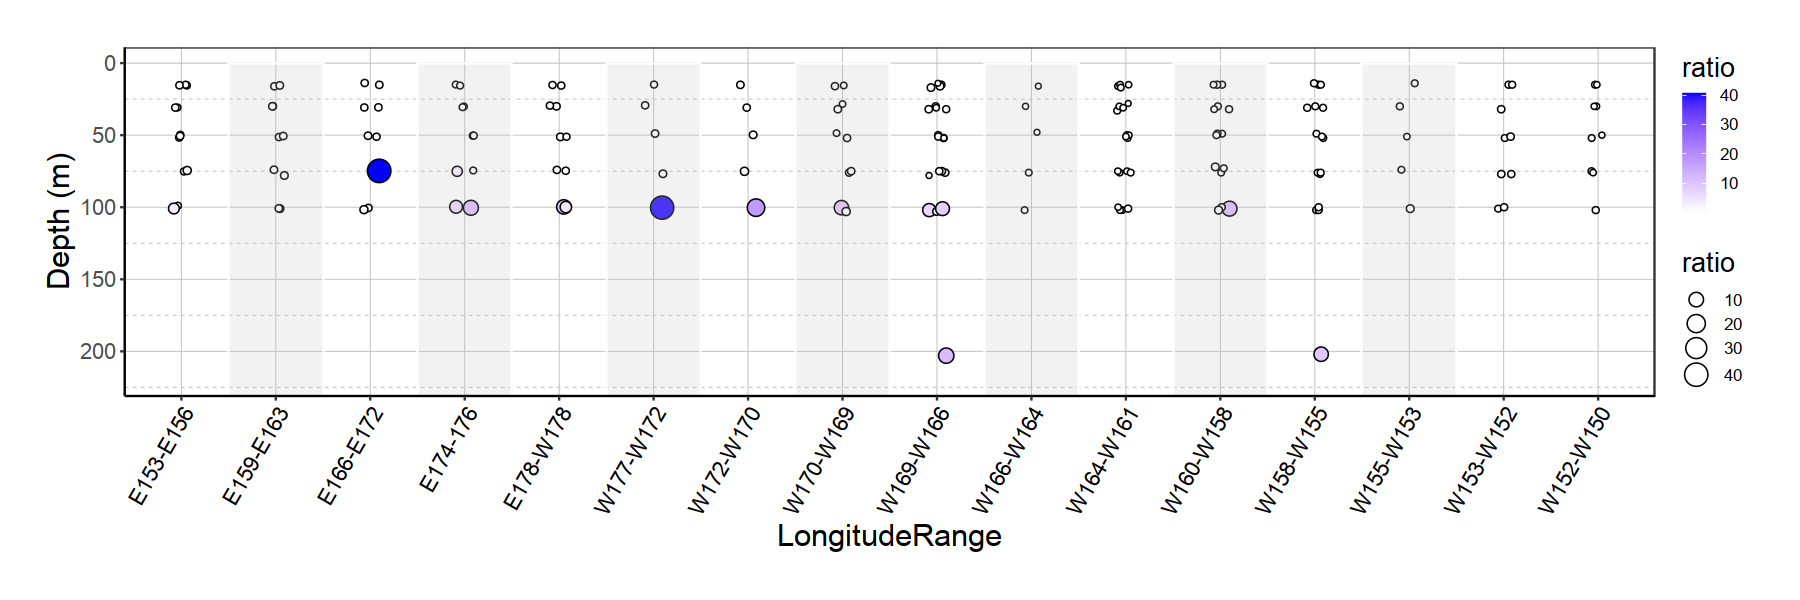

In [355]:
options(repr.plot.width=15, repr.plot.height=5)

ggplot(data=cyanophage_cyano_meta_df, mapping=aes(x=LongitudeRange, y=Depth, fill=ratio)) + 
  geom_point(aes(size=ratio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(220, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_fill_gradient(low = 'white', high = 'blue') +
  #scale_color_gradient2(low = 'blue', mid = 'white', high = 'red') +
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 

ggsave(filename="bioGEOTRACES_DEF_Class_Percentages_GP13_cyanophage_ratio_dotplot_v1.pdf", 
       plot = last_plot(), path="./", useDingbats=FALSE,
       scale = 1, width = 300, height = 100, units = "mm",
       dpi = 300, limitsize = FALSE)